# This notebook analyzes the stock prices of Netflix, Crowdstrike, Tesla and Meta and tries to predict the adjusted closing price of Crowdstrike using a LSTM.  

In [4]:
%matplotlib inline

import statsmodels.api as sm
import xlrd
import scipy 

from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from datetime import date
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
from statsmodels.tsa.api import VAR
import statsmodels.formula.api as smf
from matplotlib.ticker import FormatStrFormatter
import matplotlib.cbook as cbook
import matplotlib.image as image
import matplotlib.ticker as mtick
from matplotlib import rcParams
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import matplotlib.dates as mdates

from datetime import date
from dateutil.relativedelta import relativedelta
mpl.rcParams['figure.figsize'] = [8,5]
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['patch.facecolor']='xkcd:white'



import pylab as pl
import matplotlib


matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.size"] = "10"

import seaborn as sns

sns.set_palette("icefire")



from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [3]:

tech_list = ['NFLX', 'CRWD', 'TSLA', 'META']



end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [NFLX, CRWD, TSLA, META]
company_name = ["Netflix", "Crowdstrike", "Tesla", "Meta"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-20  213.479996  216.750000  212.770004  213.070007  213.070007   
2023-04-21  210.210007  213.410004  209.580002  212.889999  212.889999   
2023-04-24  213.679993  213.919998  210.710007  212.789993  212.789993   
2023-04-25  210.820007  211.259995  207.130005  207.550003  207.550003   
2023-04-26  212.500000  214.110001  208.880005  209.399994  209.399994   
2023-04-27  239.889999  241.690002  236.770004  238.559998  238.559998   
2023-04-28  239.009995  240.429993  235.750000  240.320007  240.320007   
2023-05-01  238.619995  244.000000  236.460007  243.179993  243.179993   
2023-05-02  243.179993  244.919998  238.990005  239.240005  239.240005   
2023-05-03  239.470001  241.740005  232.750000  237.029999  237.029999   

              Volume company_name  
Date                               
2023-04-20  16475400         Meta  
2023-04-21  17702400         Meta  
2023-04-24  15750900         Meta  
2023-04-25  19198200         Meta  
2023-04-26  41992700         Meta  
2023-04-27  71196500         Meta  
2023-04-28  39554000         Meta  
2023-05-01  29143900         Meta  
2023-05-02  24350100         Meta  
2023-05-03  33986824         Meta

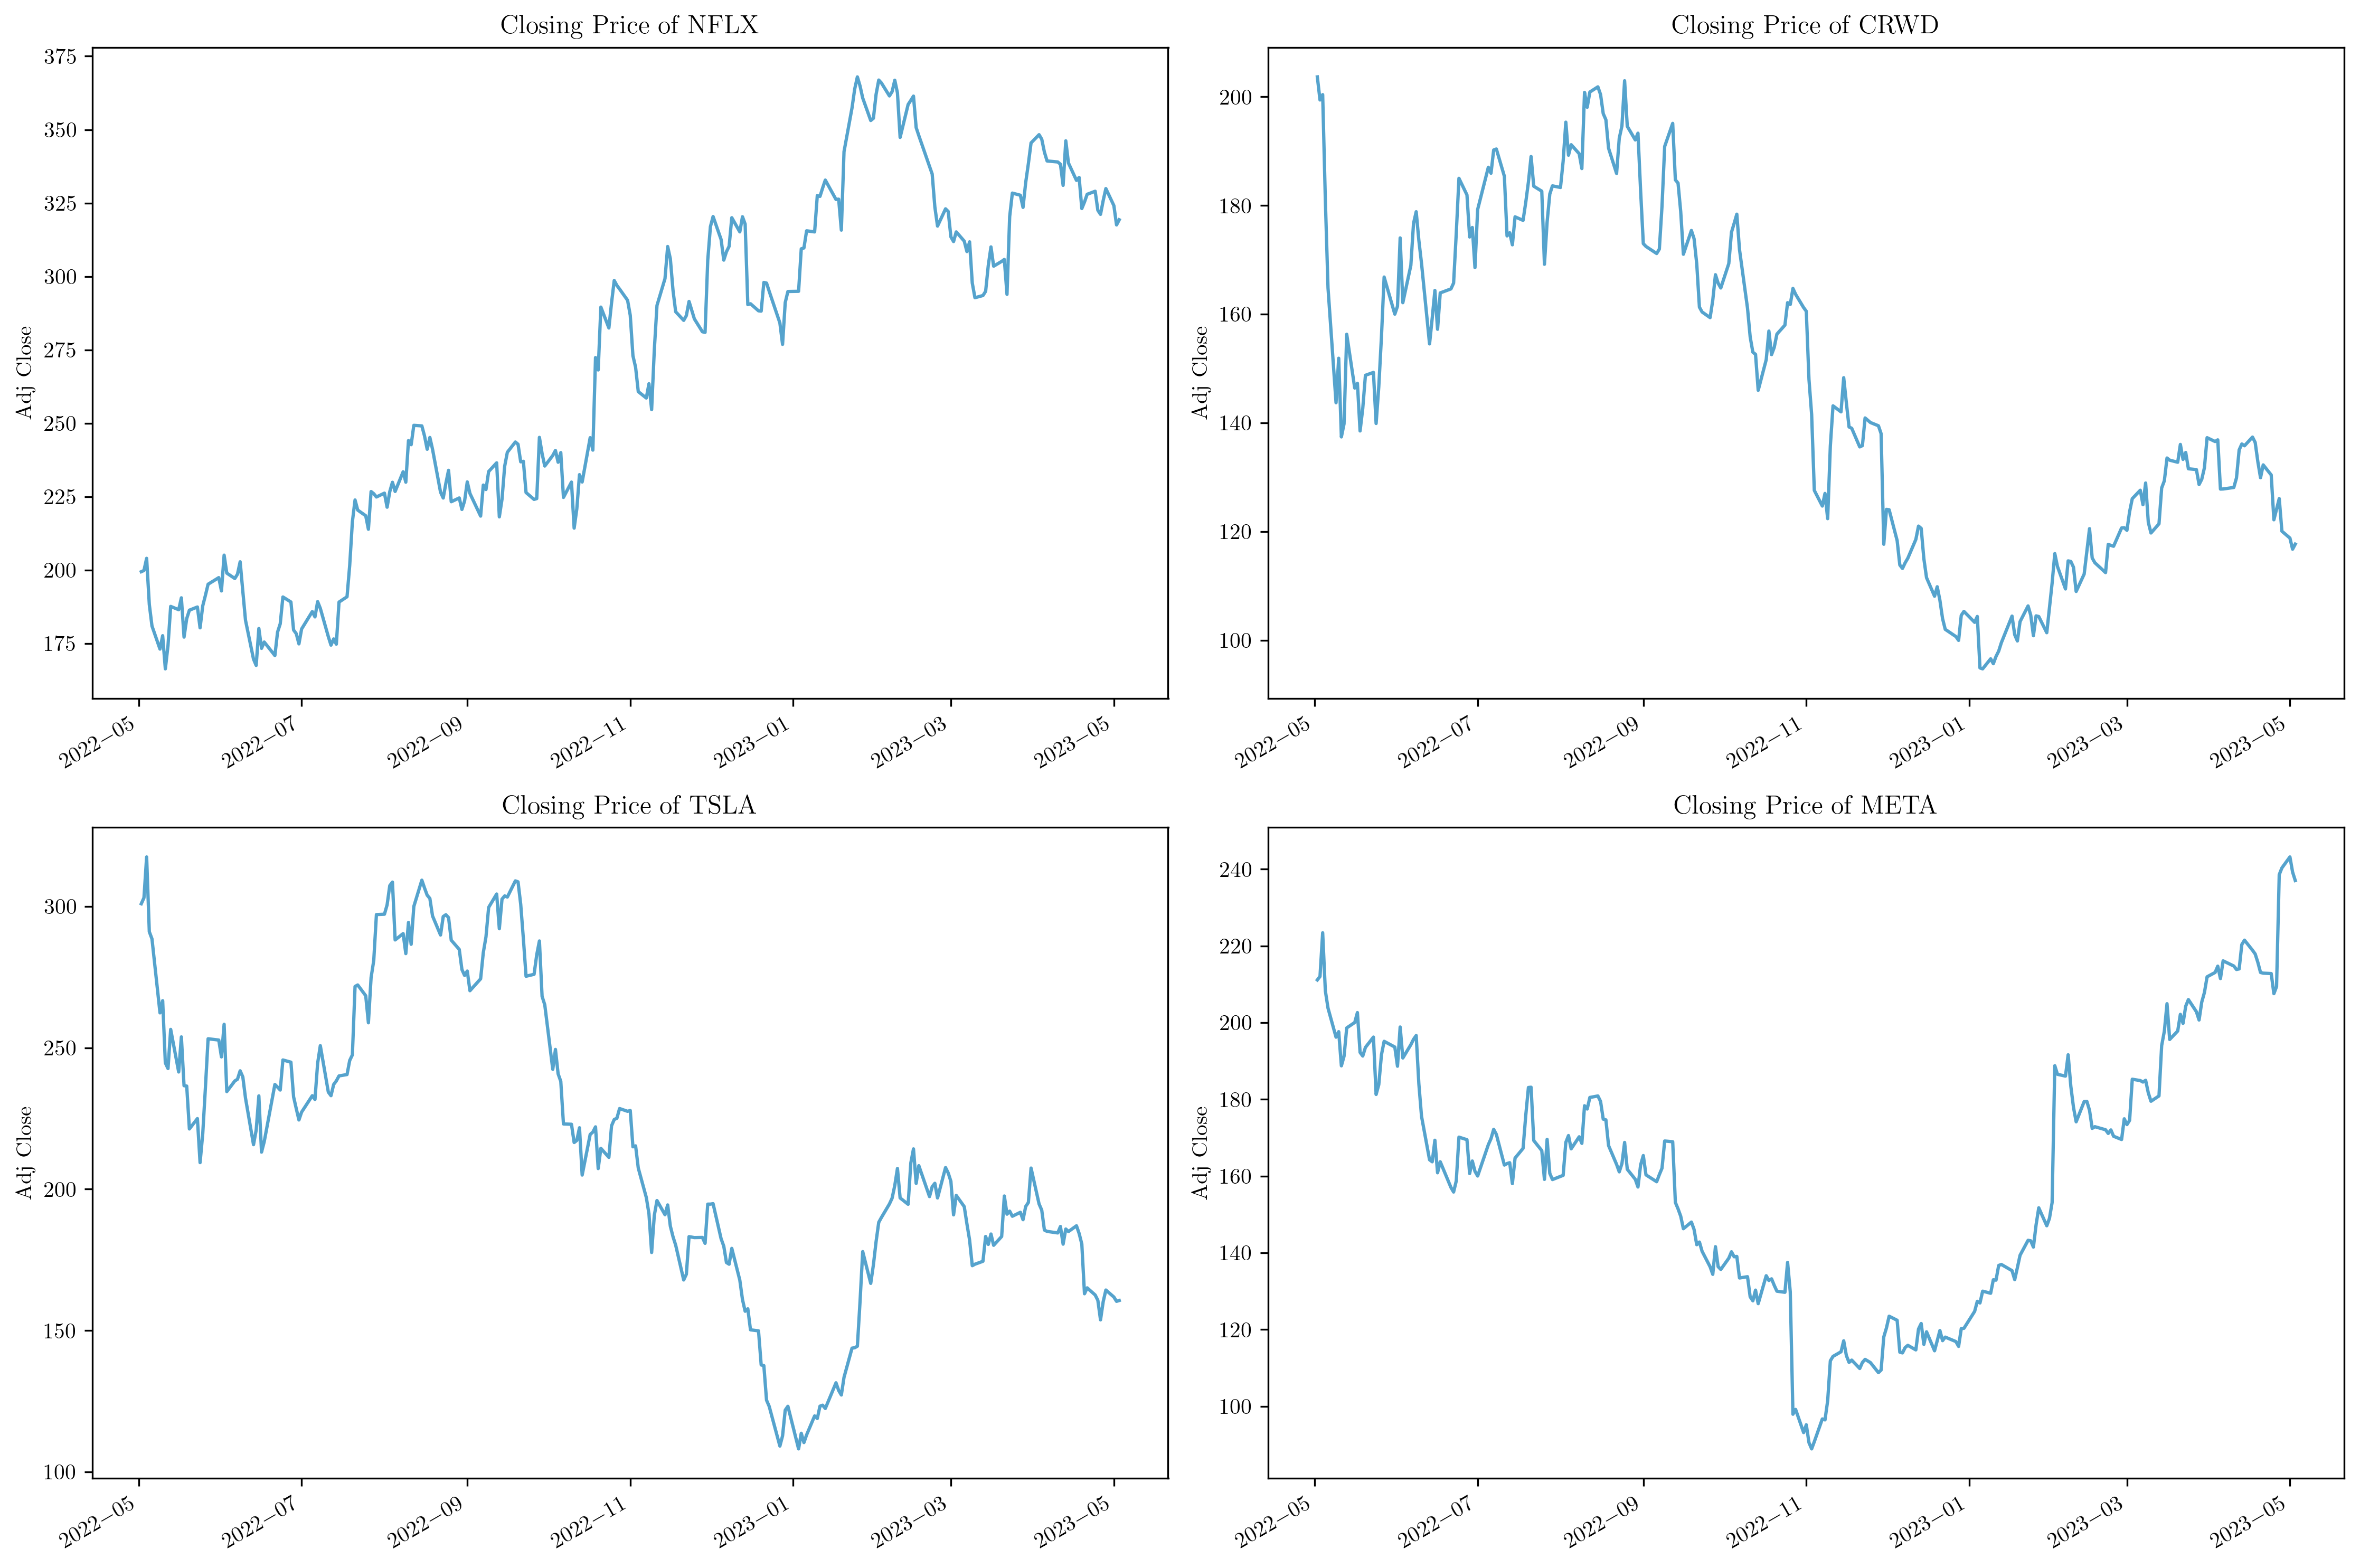

In [53]:

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

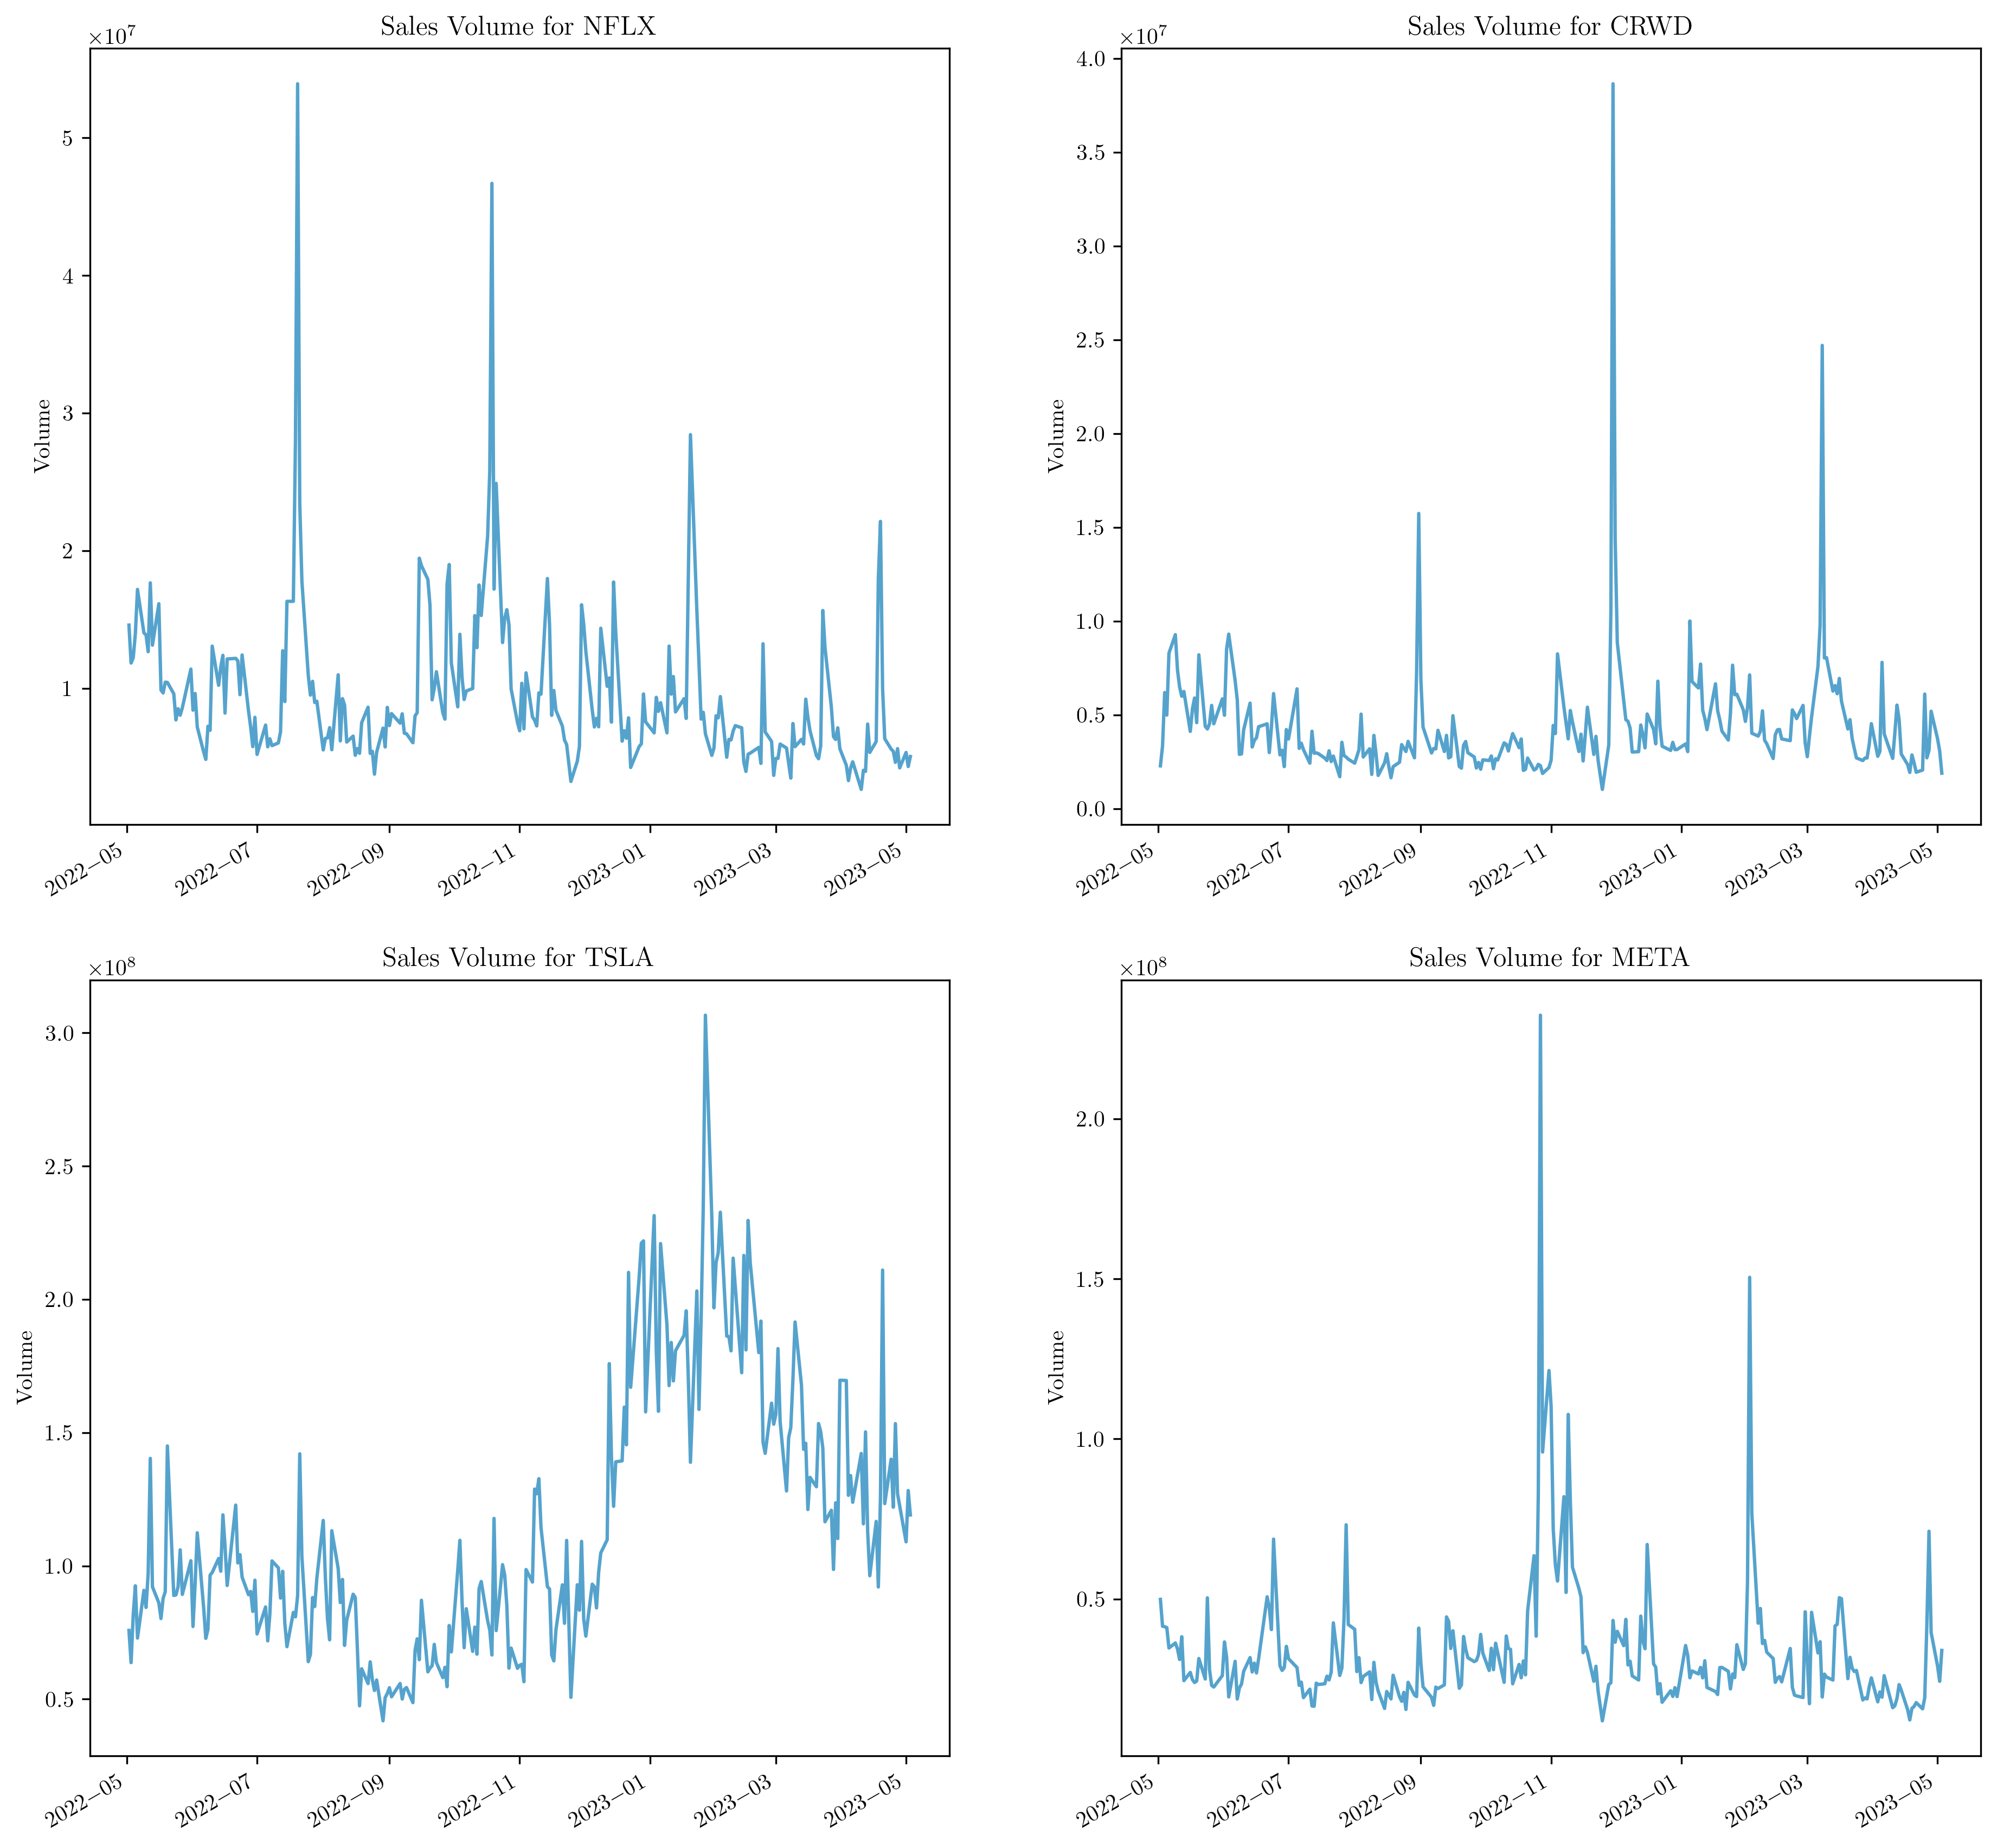

In [54]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.show()

## Visualizing the 5, 10, and 20 days Moving Averages

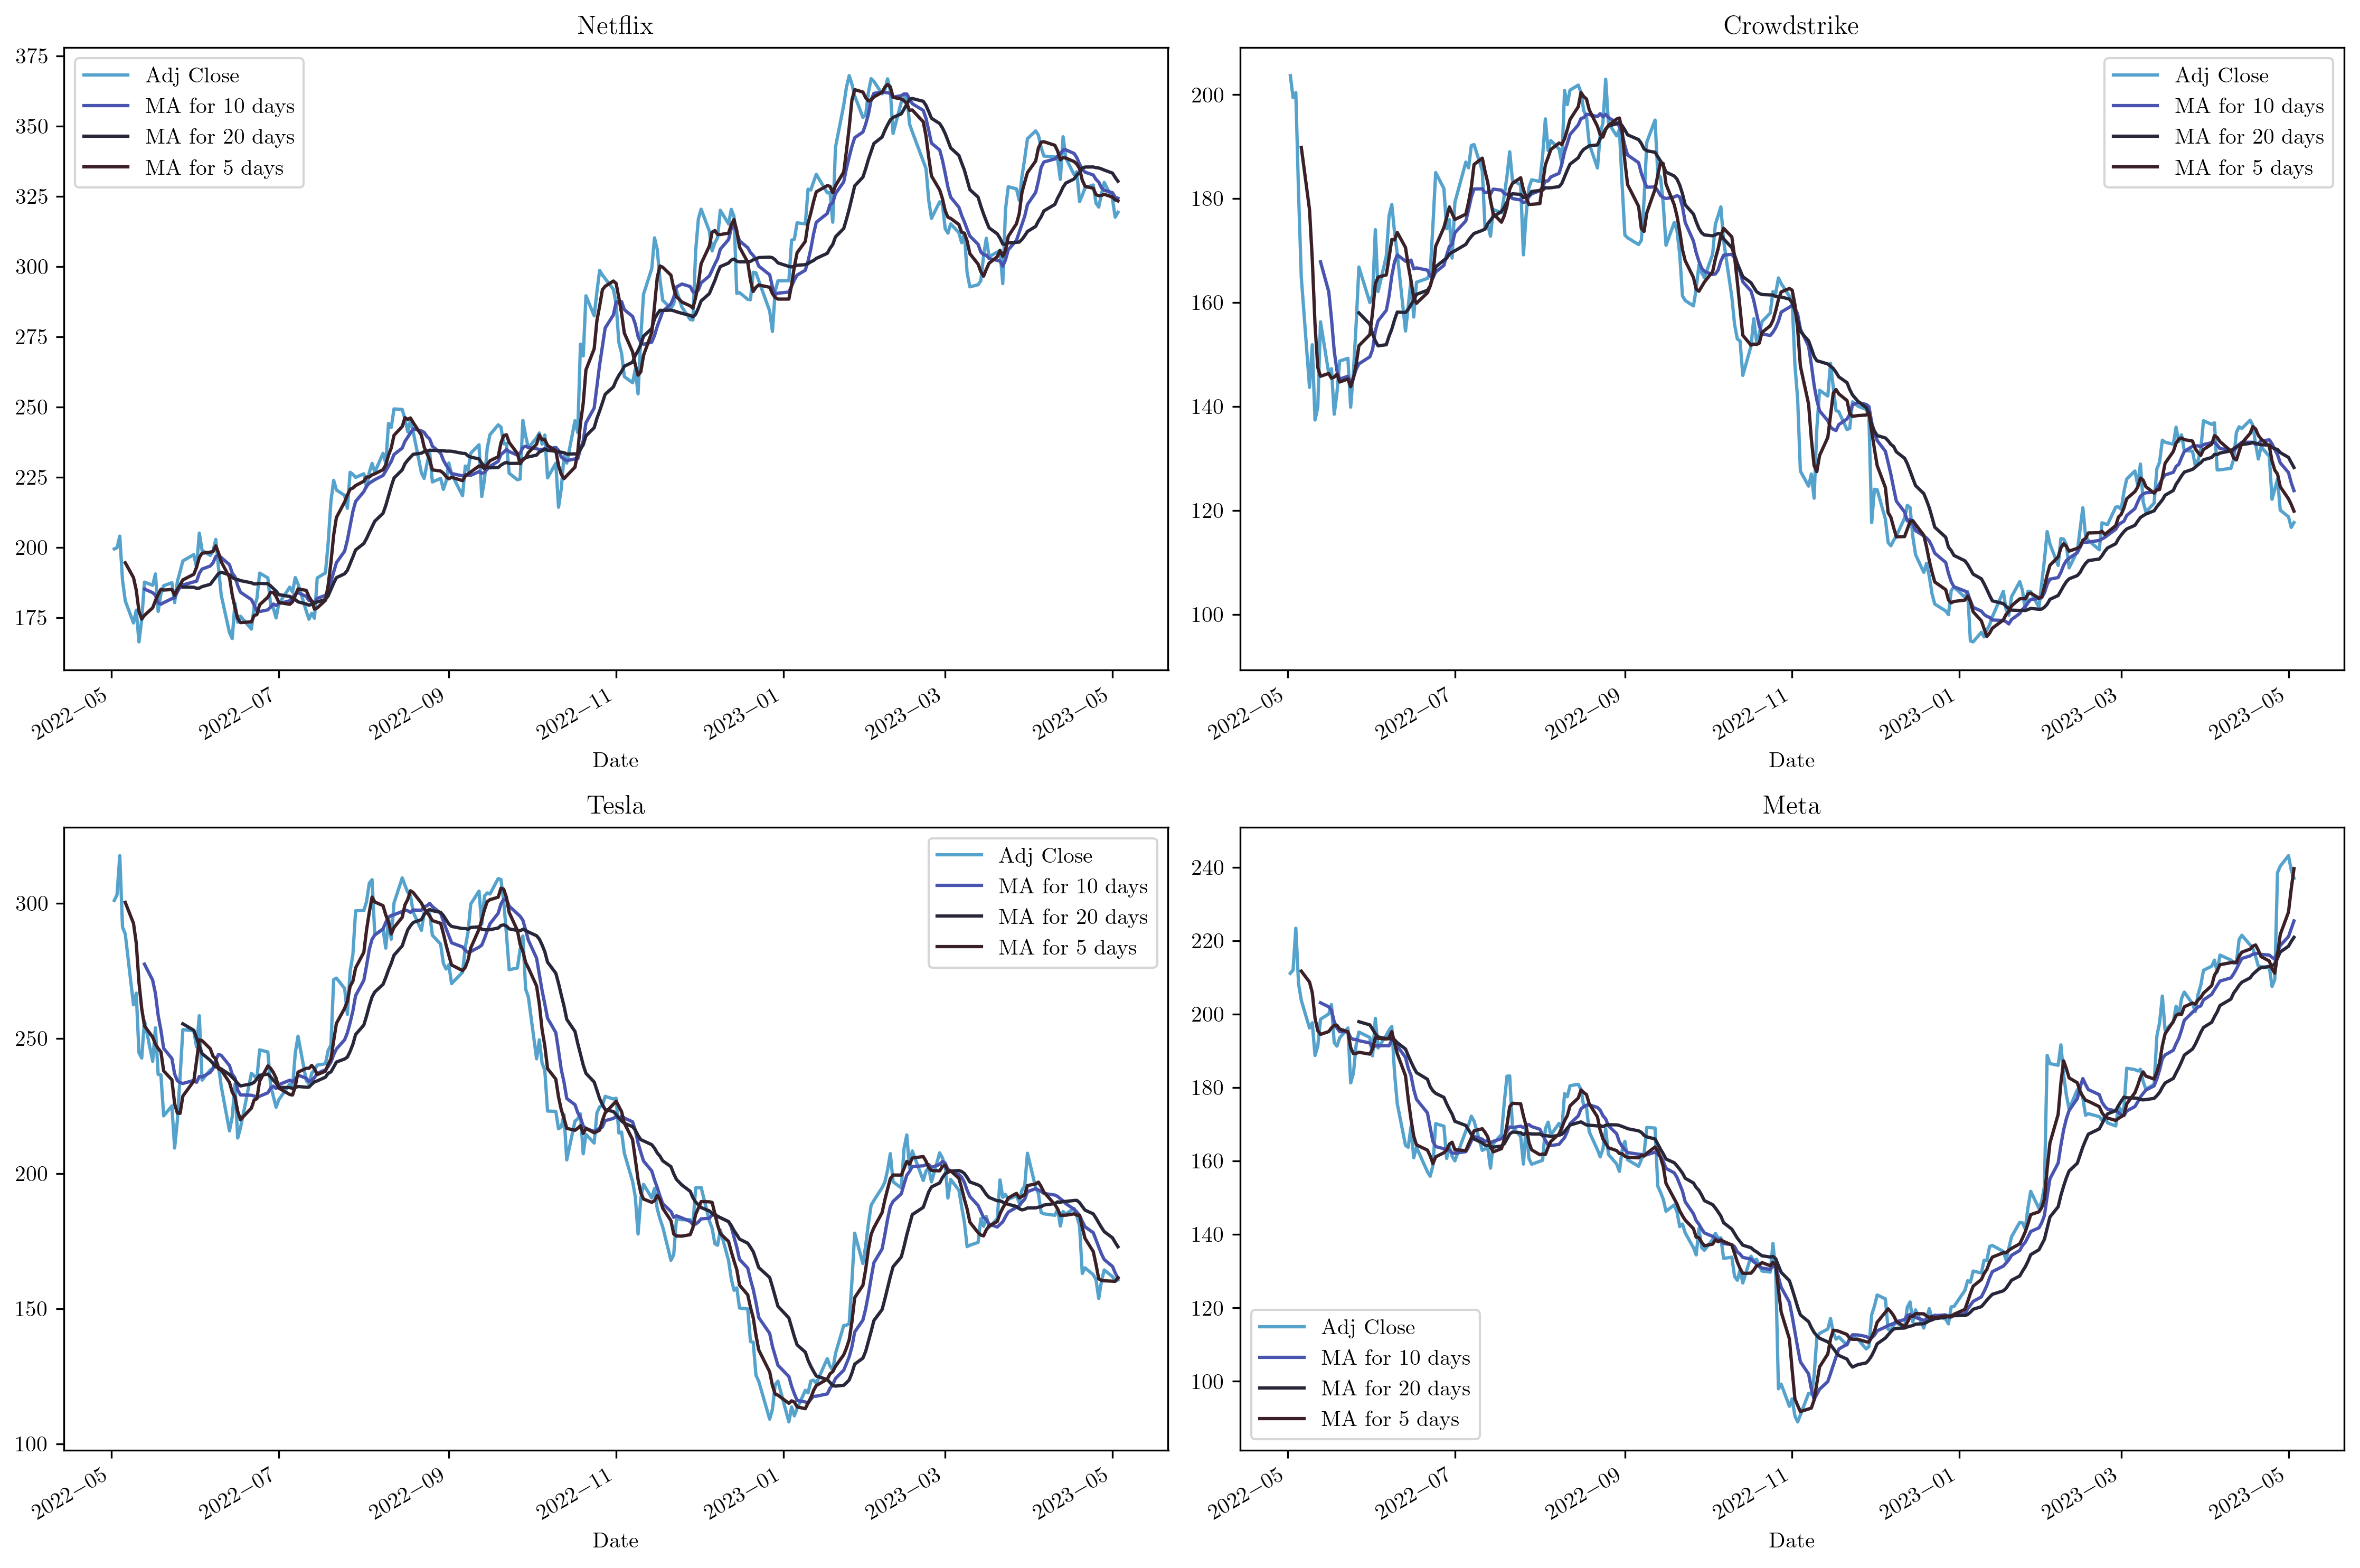

In [55]:
ma_day = [10, 20, 5]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

NFLX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 5 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Netflix')

CRWD[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 5 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Crowdstrike')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 5 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Tesla')

META[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 5 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Meta')

fig.tight_layout()

# Visualizing the daily returns of the stock prices

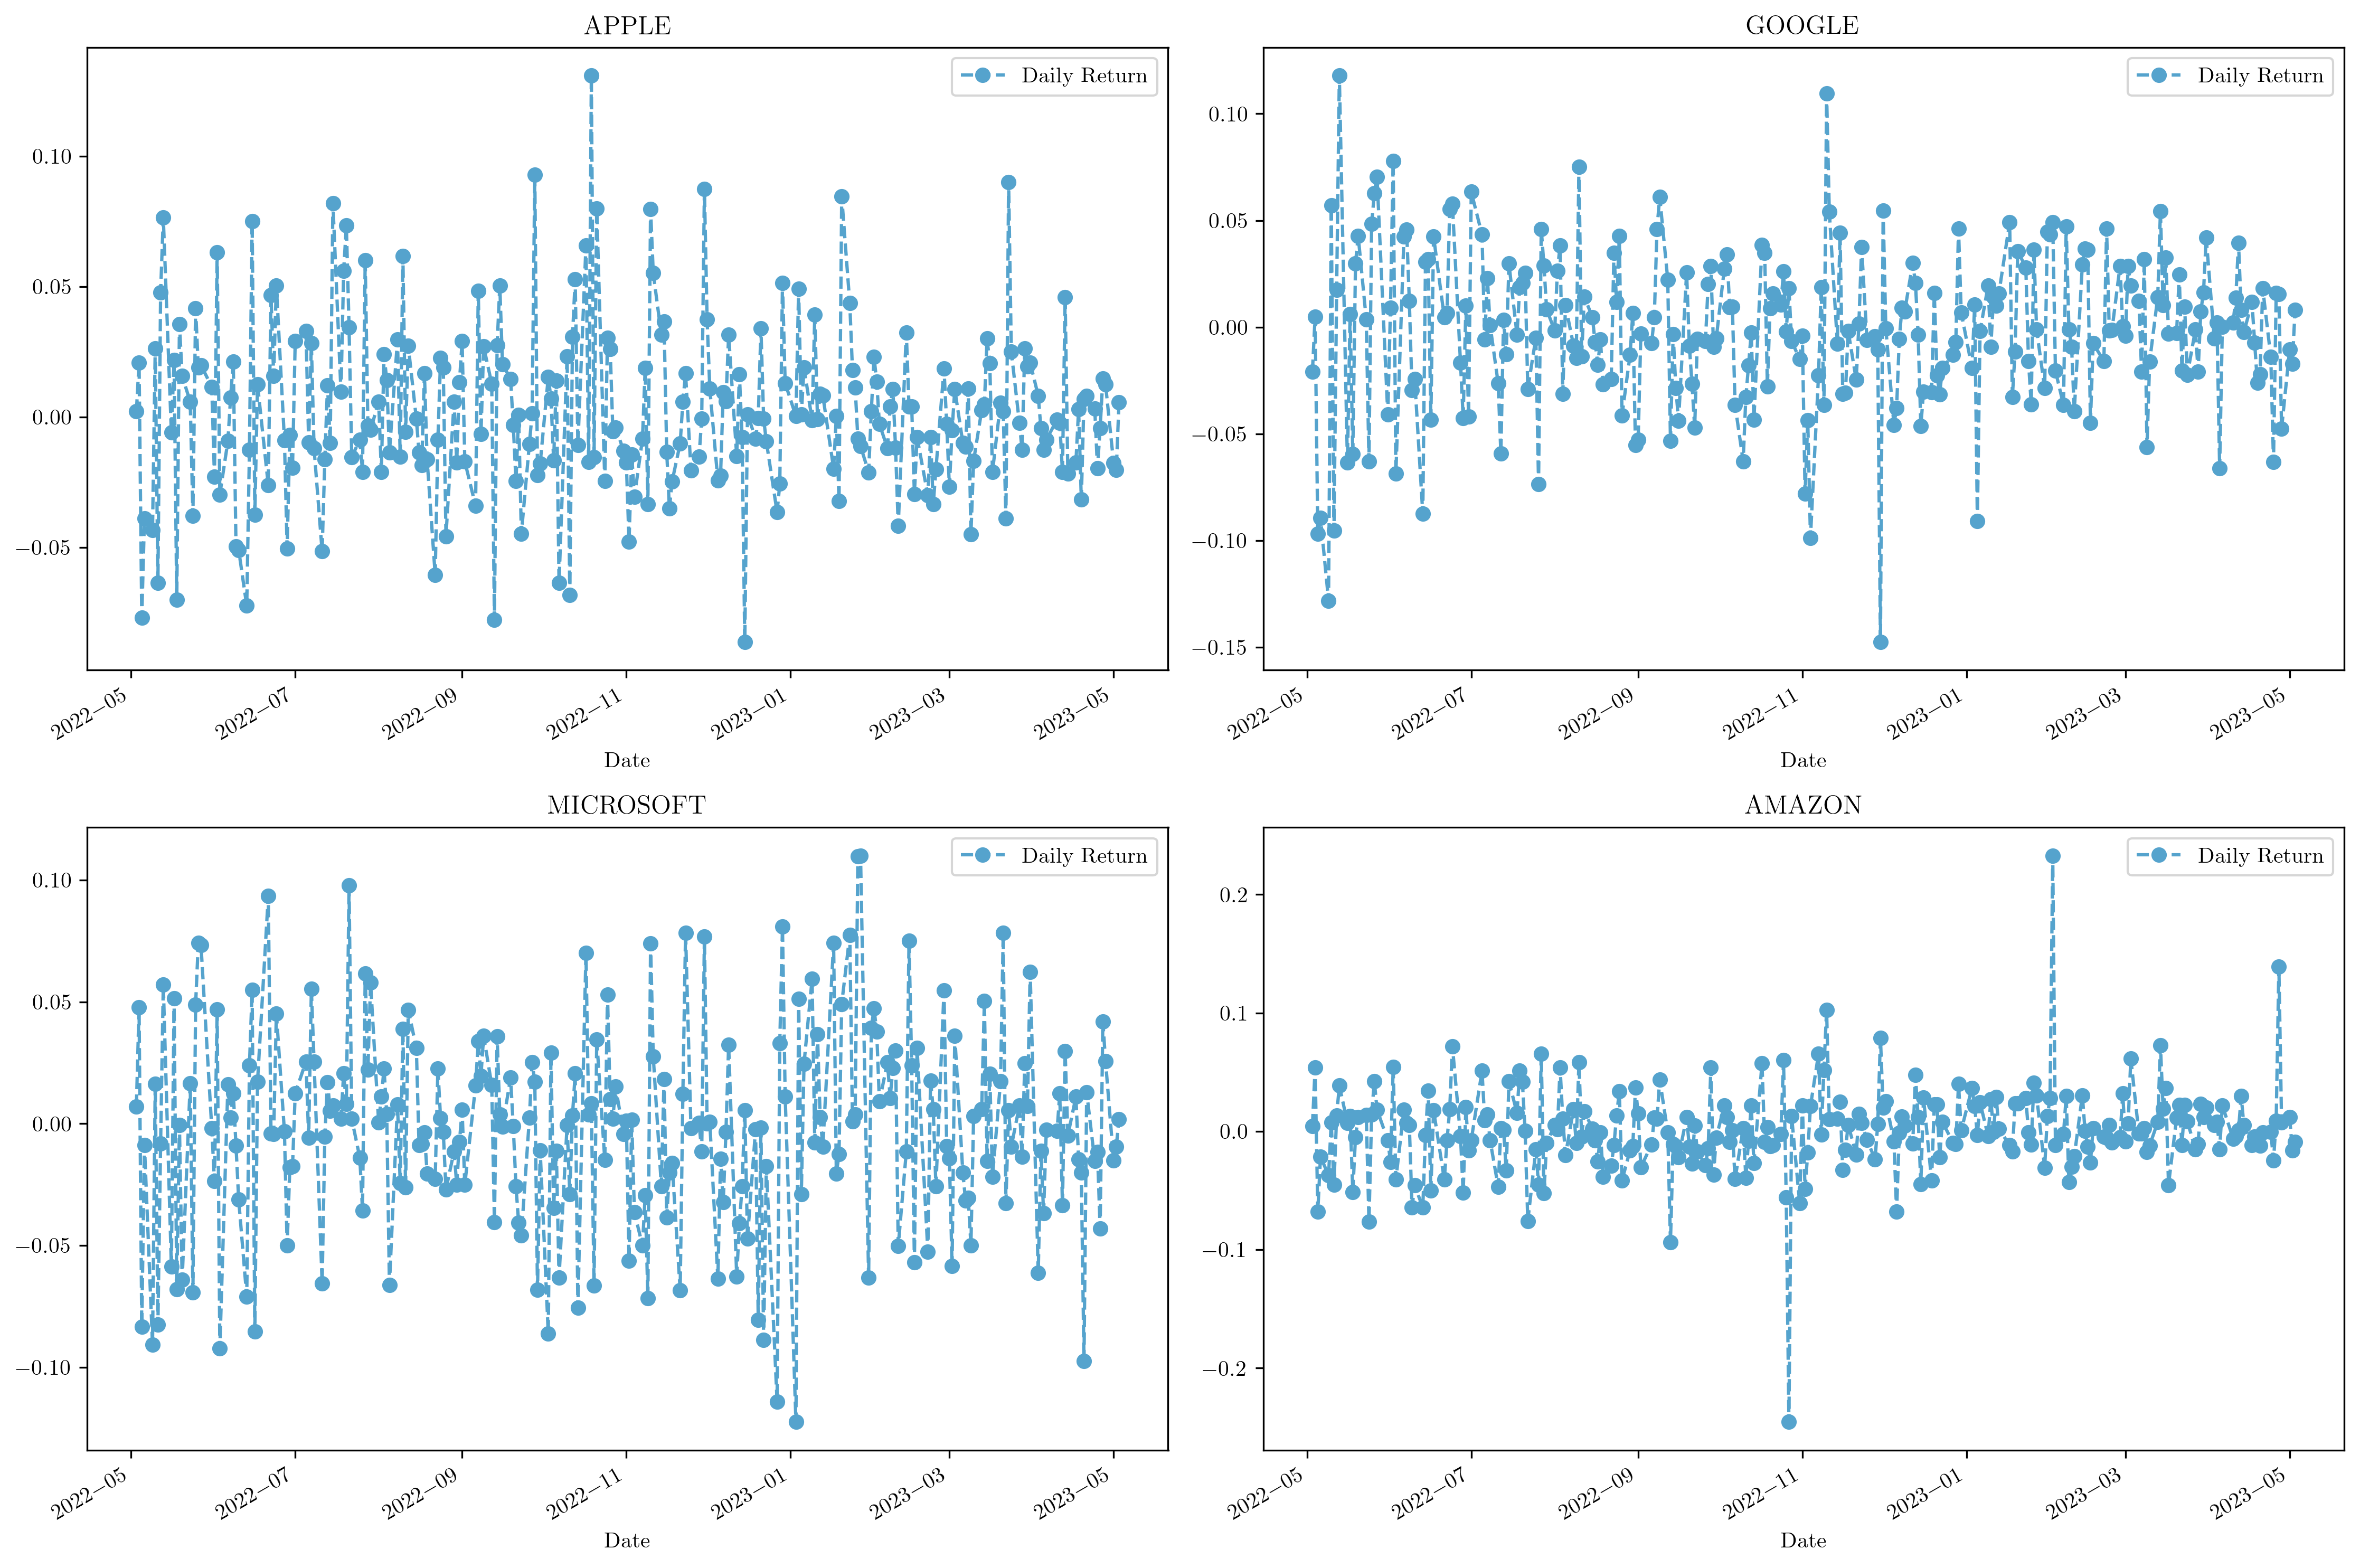

In [57]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

NFLX['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

CRWD['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

TSLA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

META['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# The returns visualized as histogram

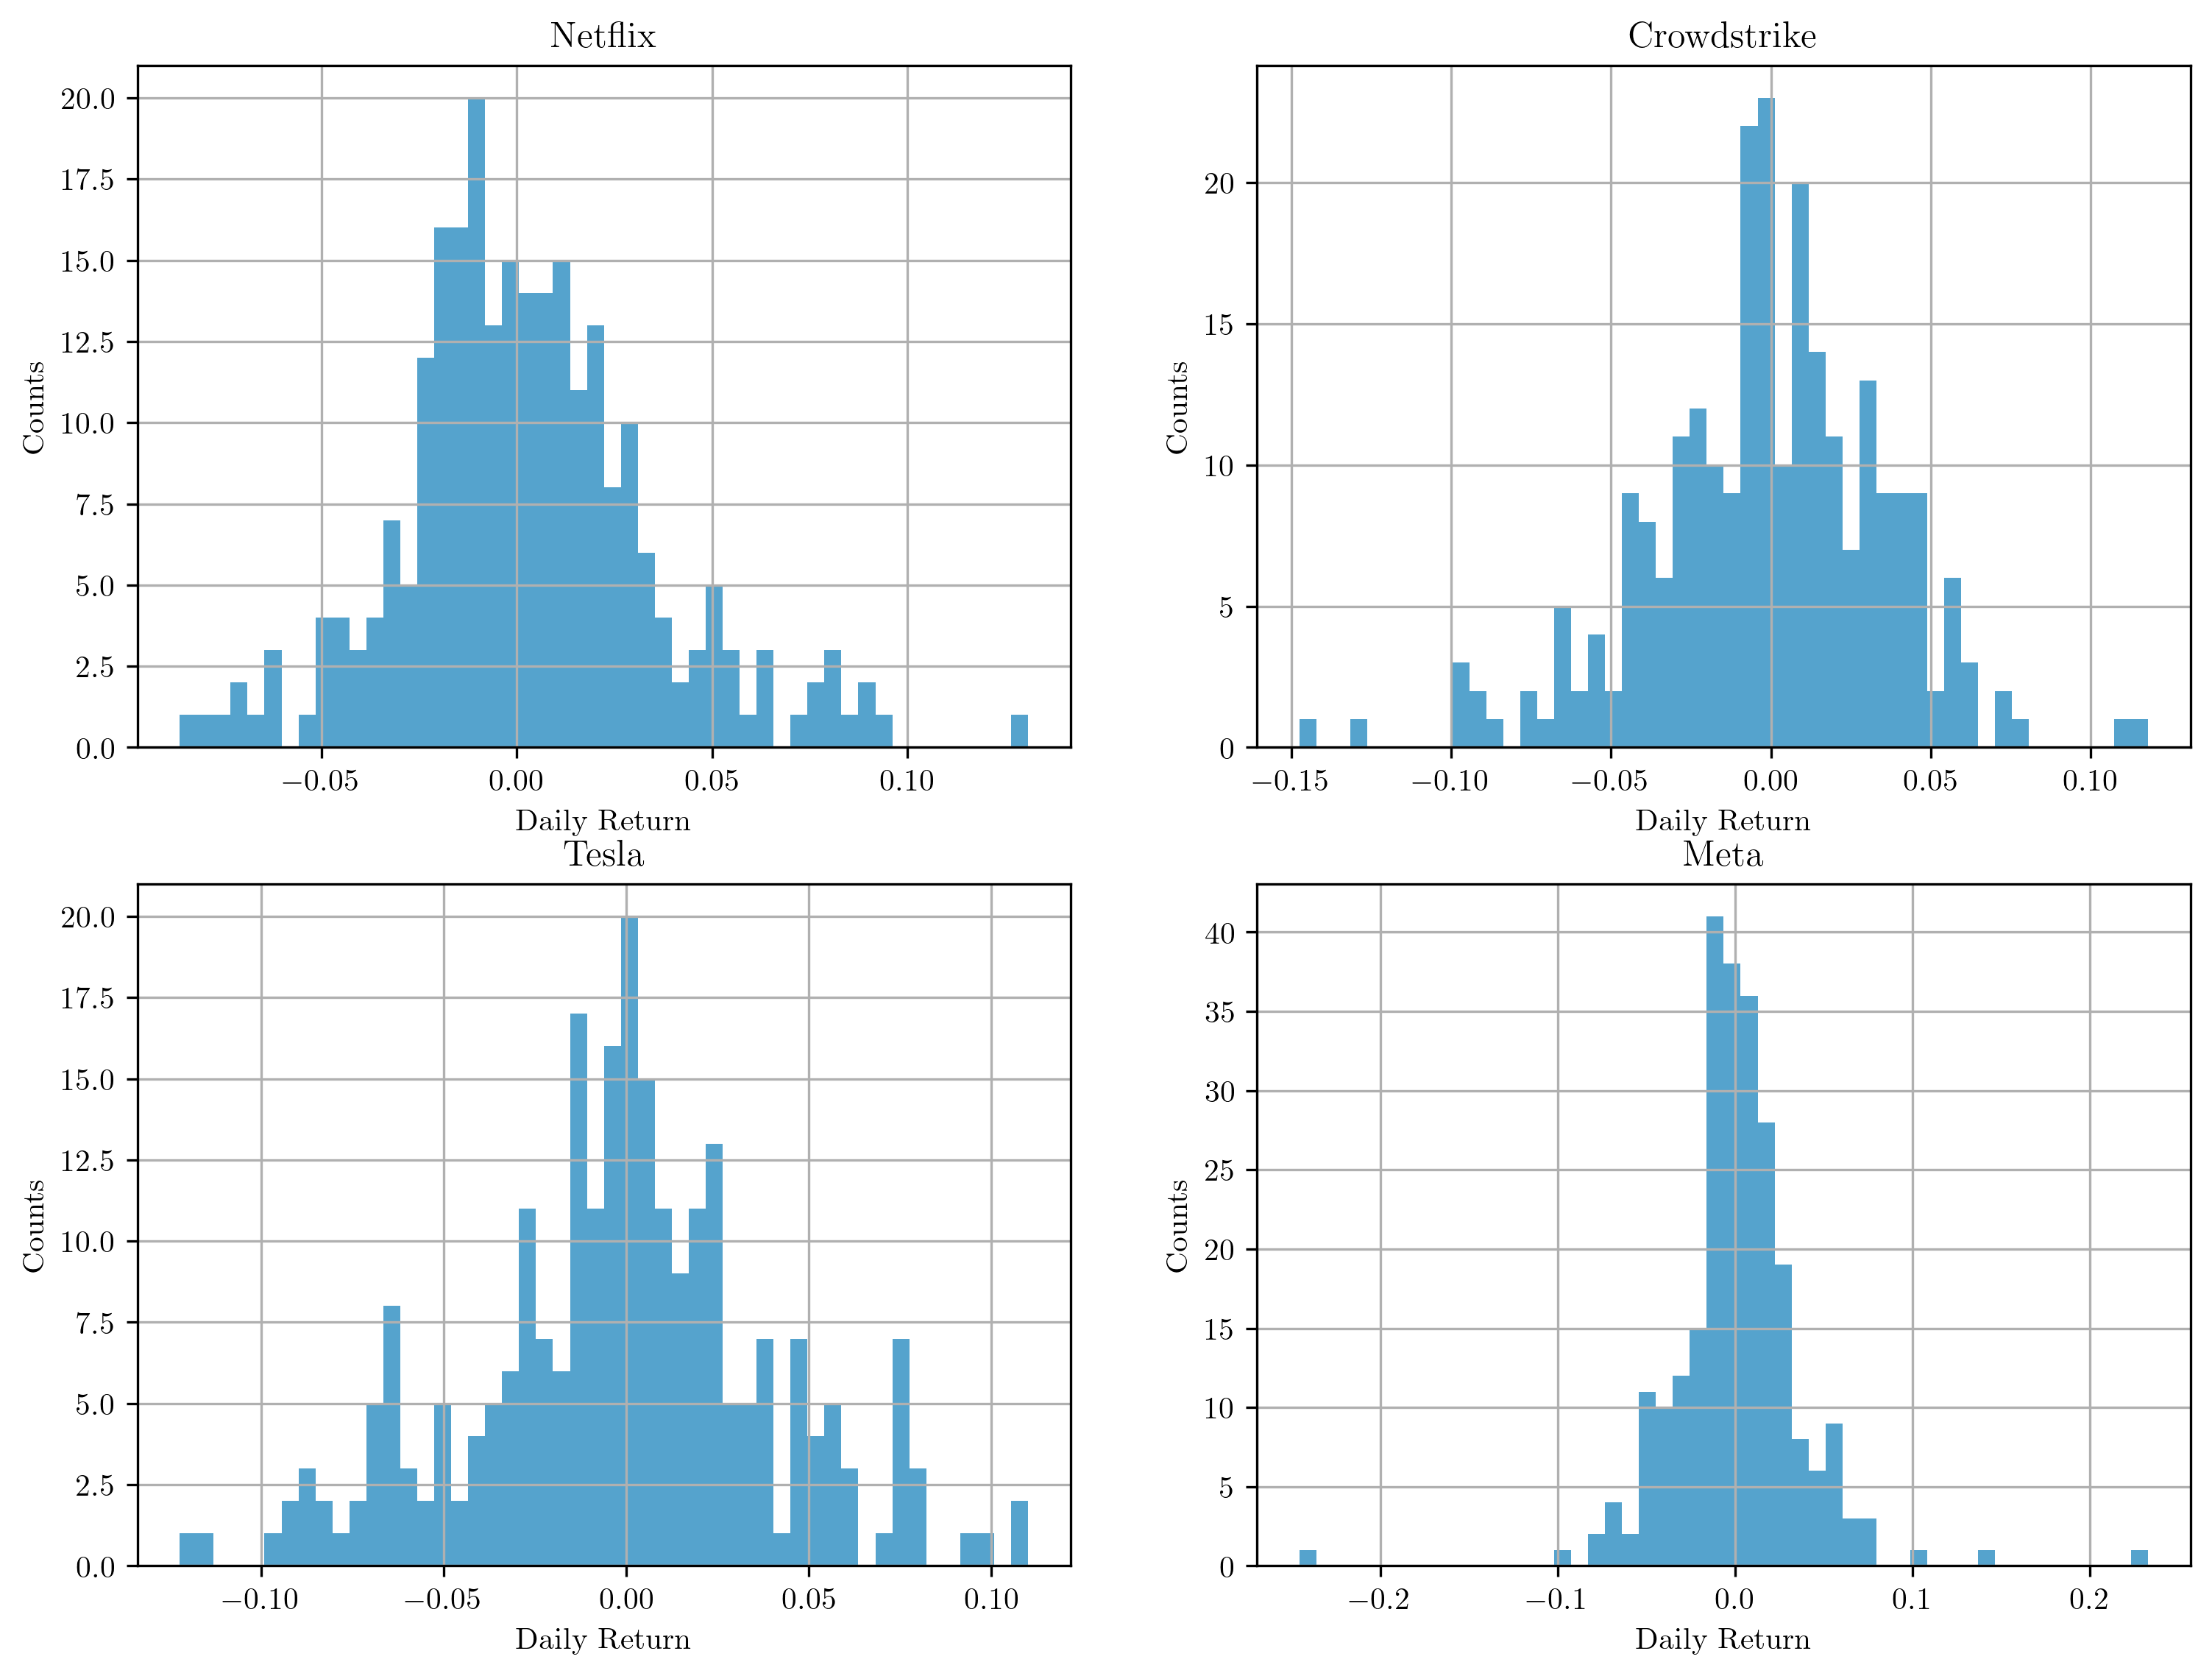

In [58]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.show()

# Identifying correlations in between the variables

[*********************100%***********************]  4 of 4 completed


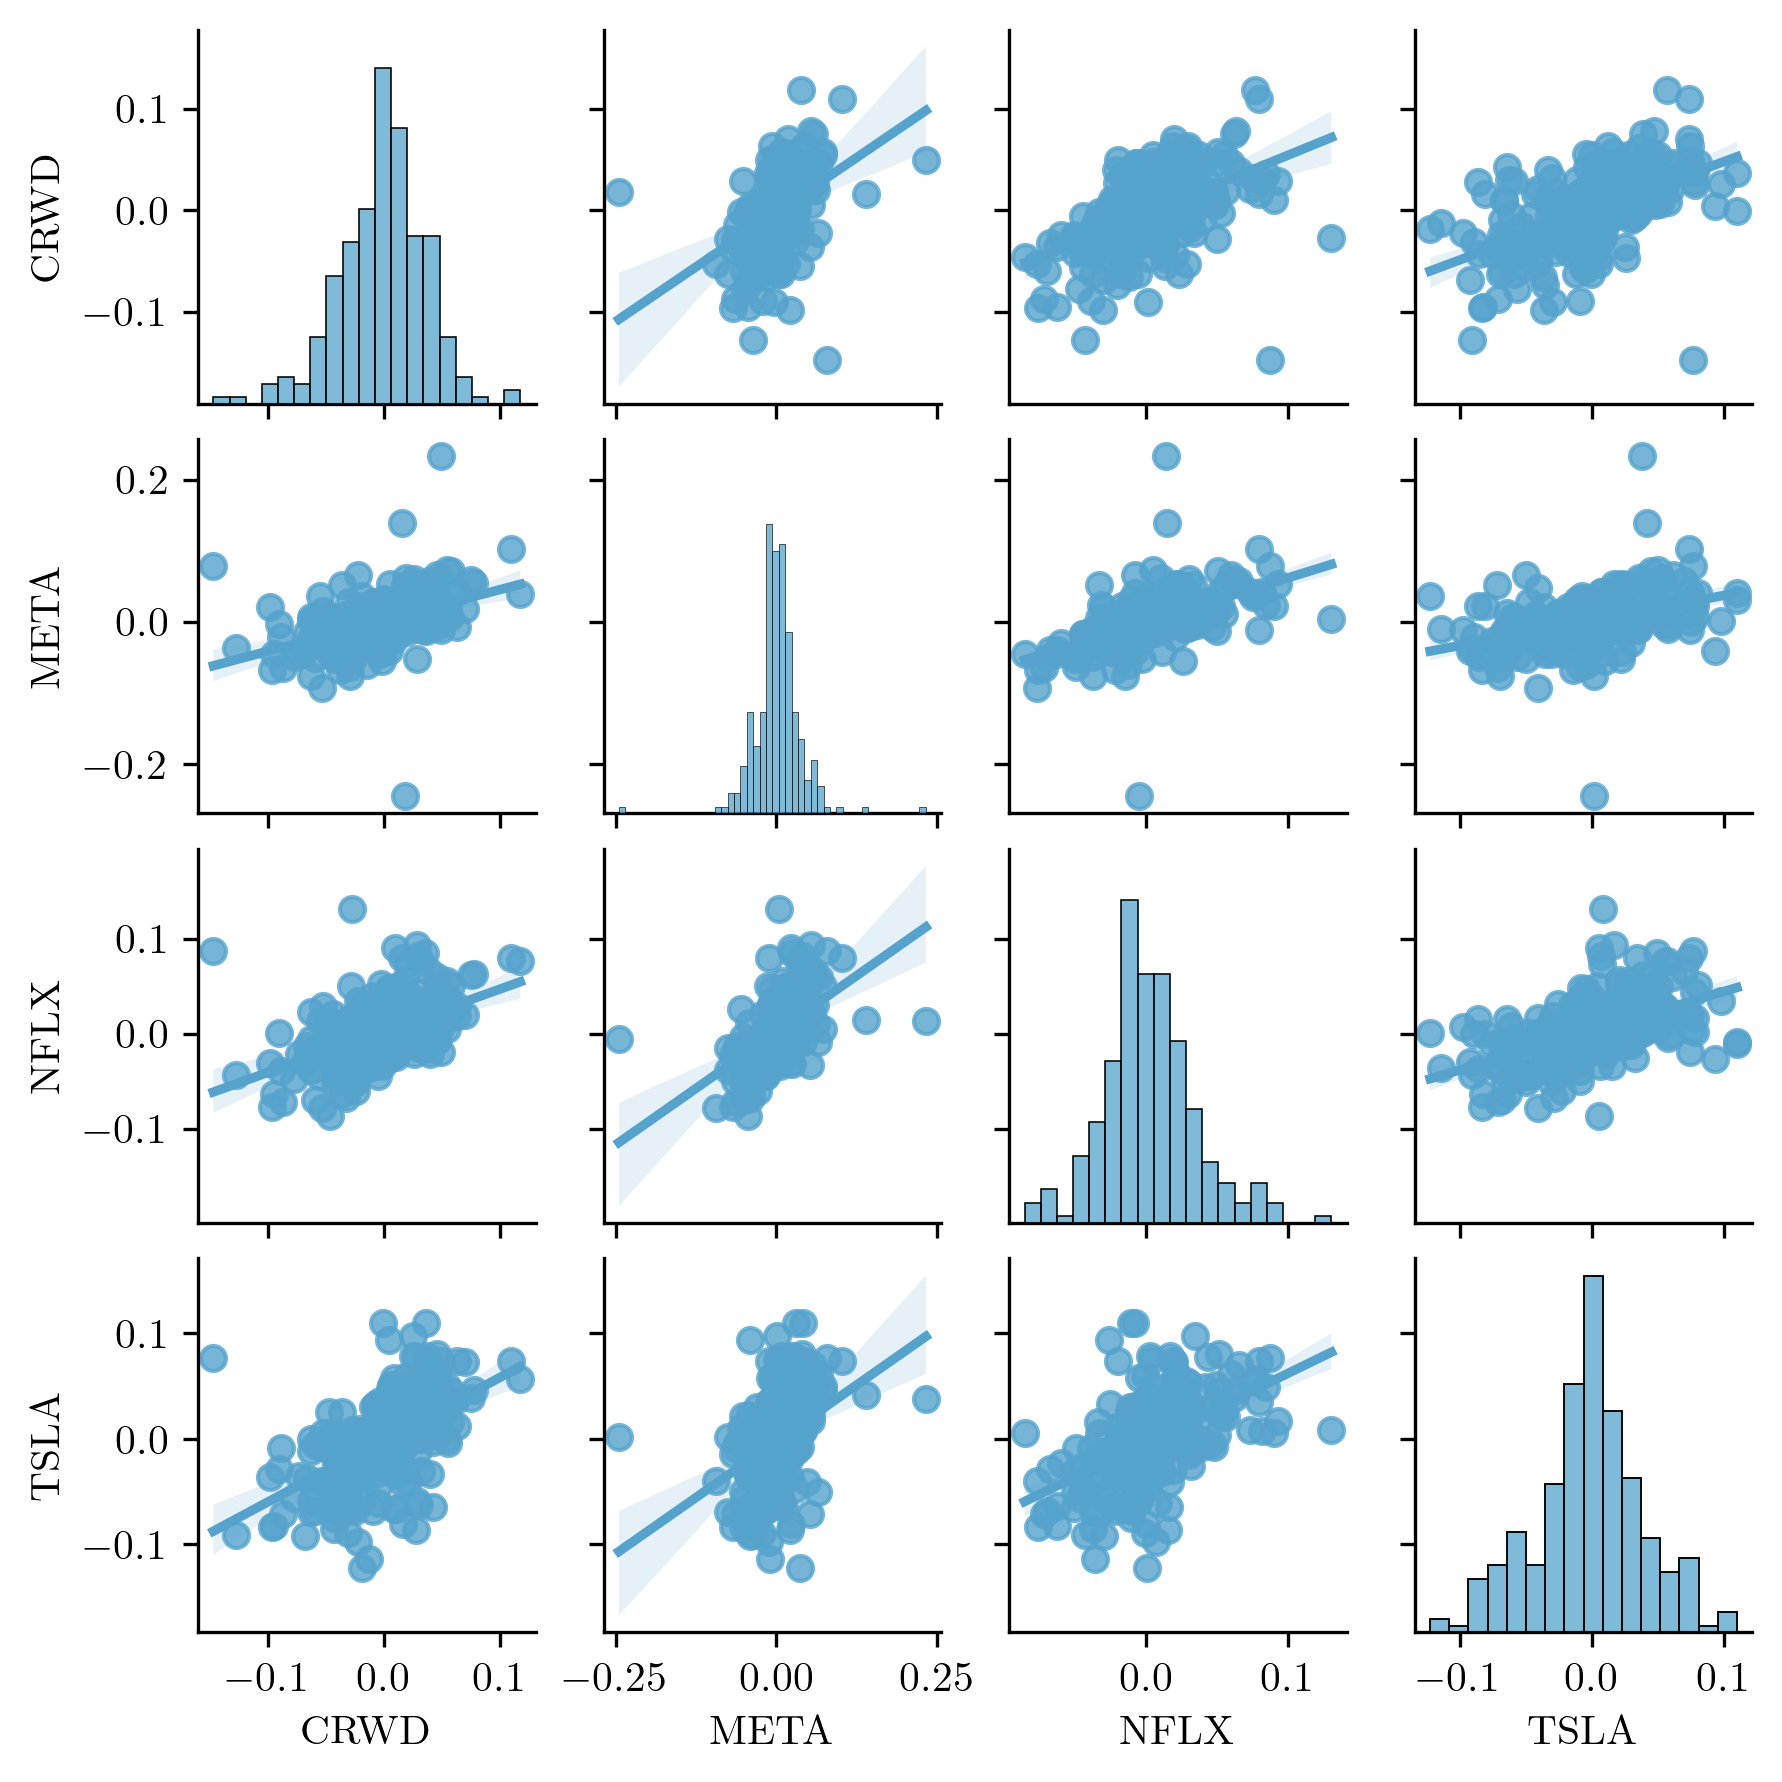

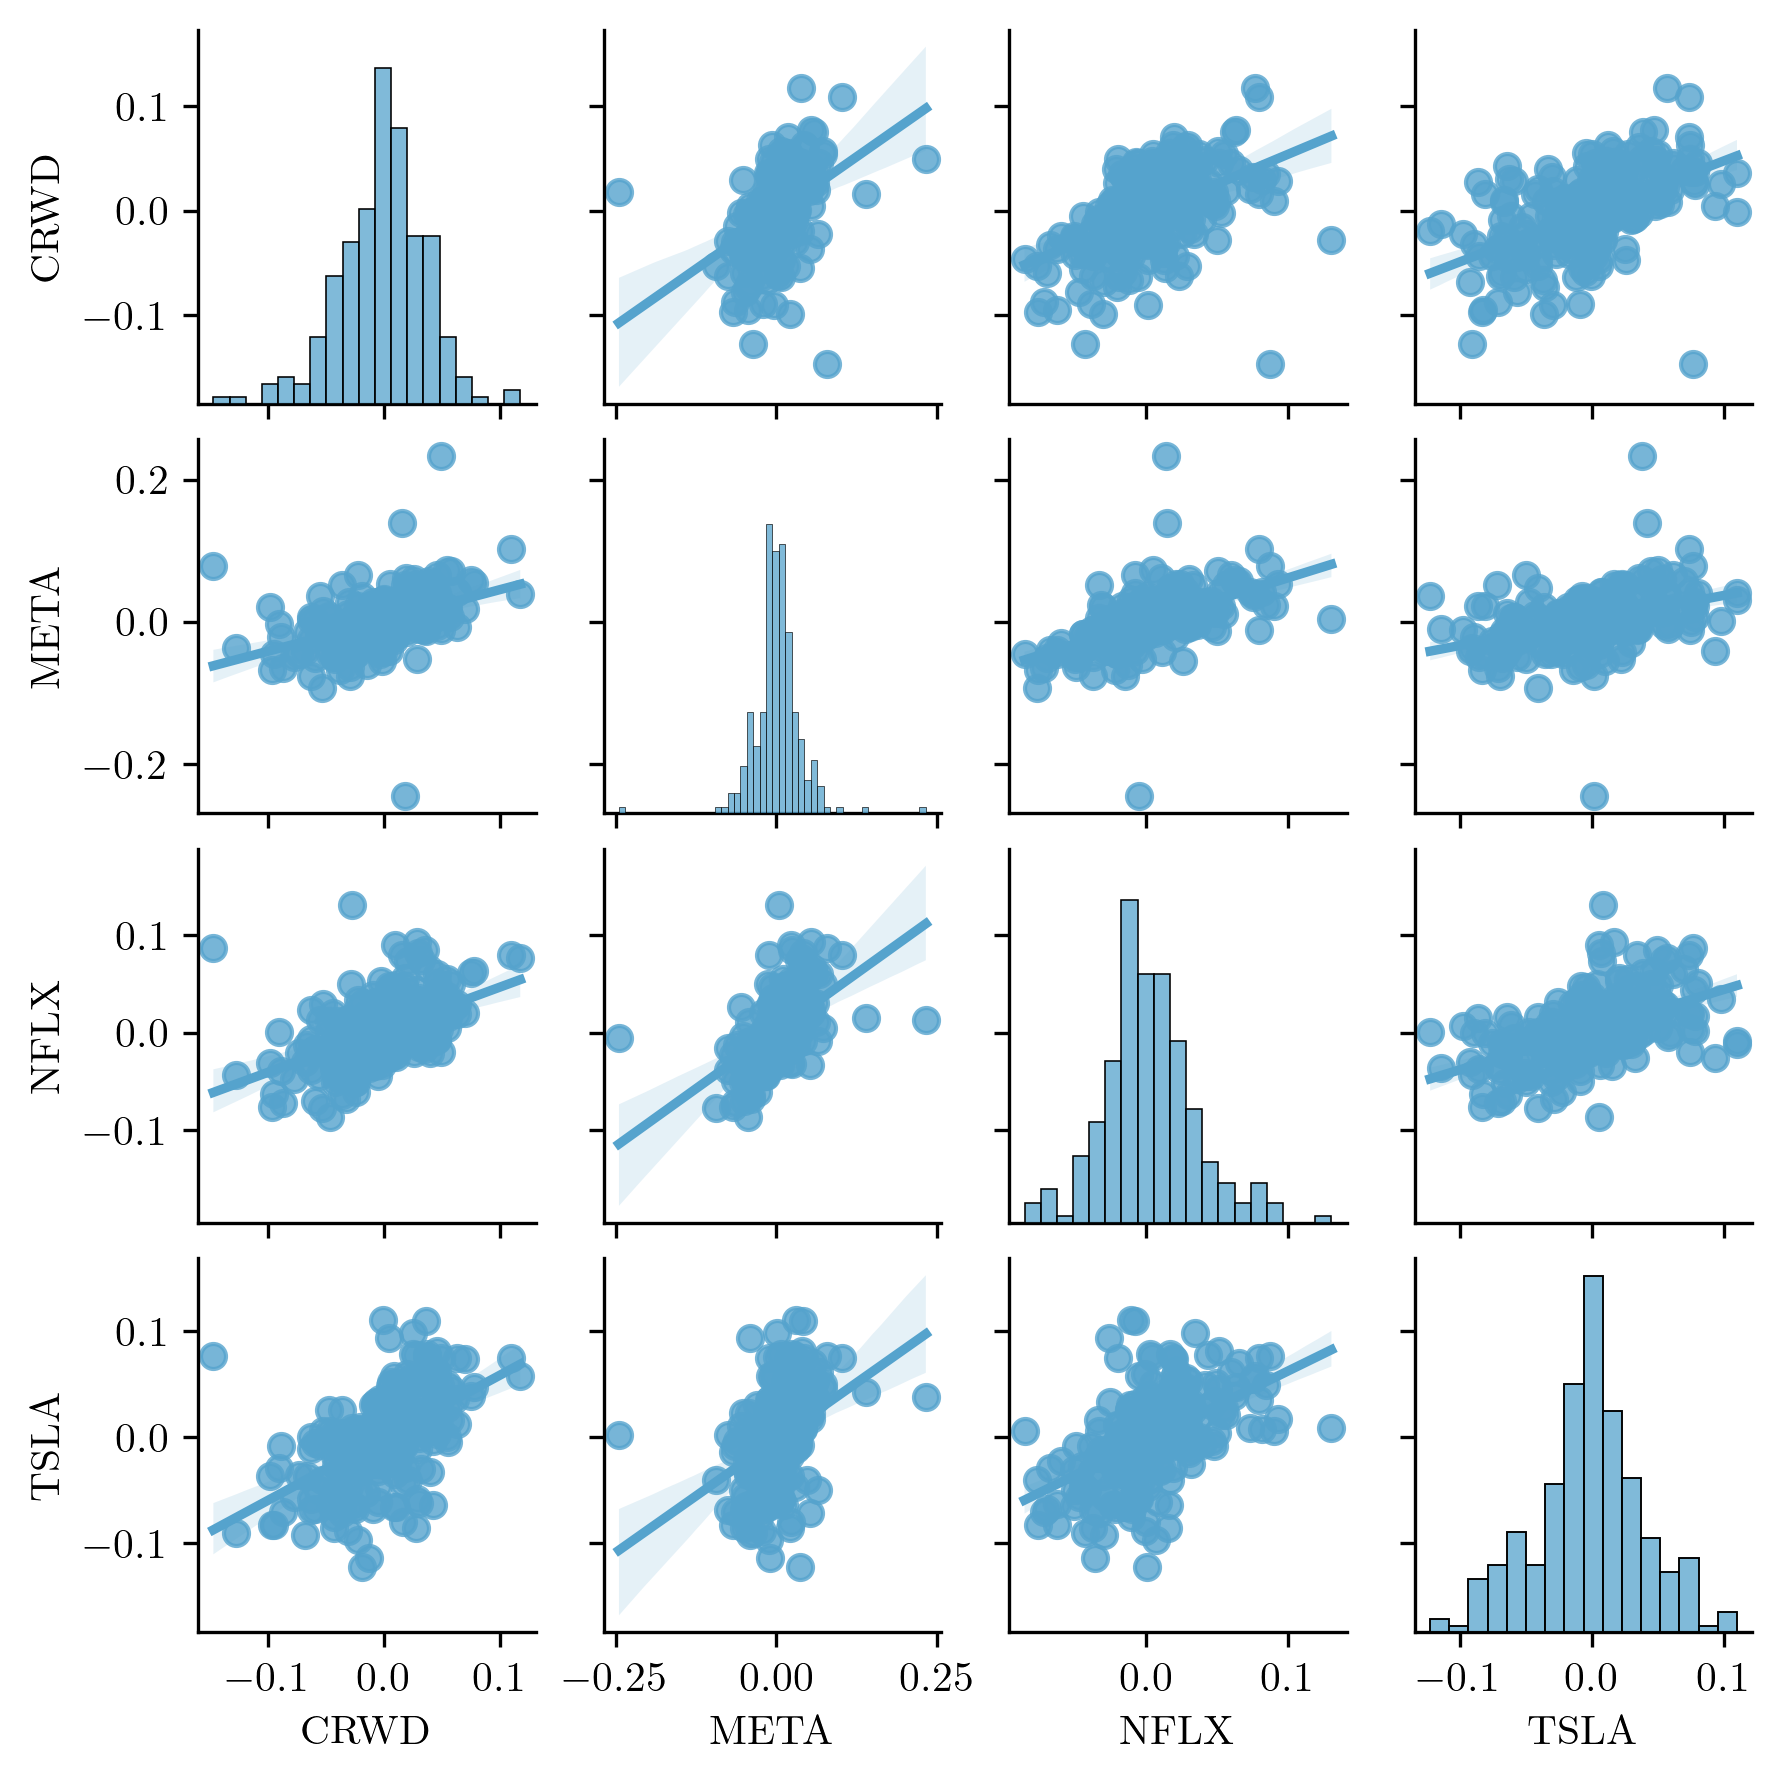

In [22]:

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

tech_rets = closing_df.pct_change()
tech_rets= tech_rets.dropna()

sns.pairplot(tech_rets, kind='reg',height=1.5)

sns.pairplot(tech_rets, kind='reg',height=1.5)

# Kernel density estimate
A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

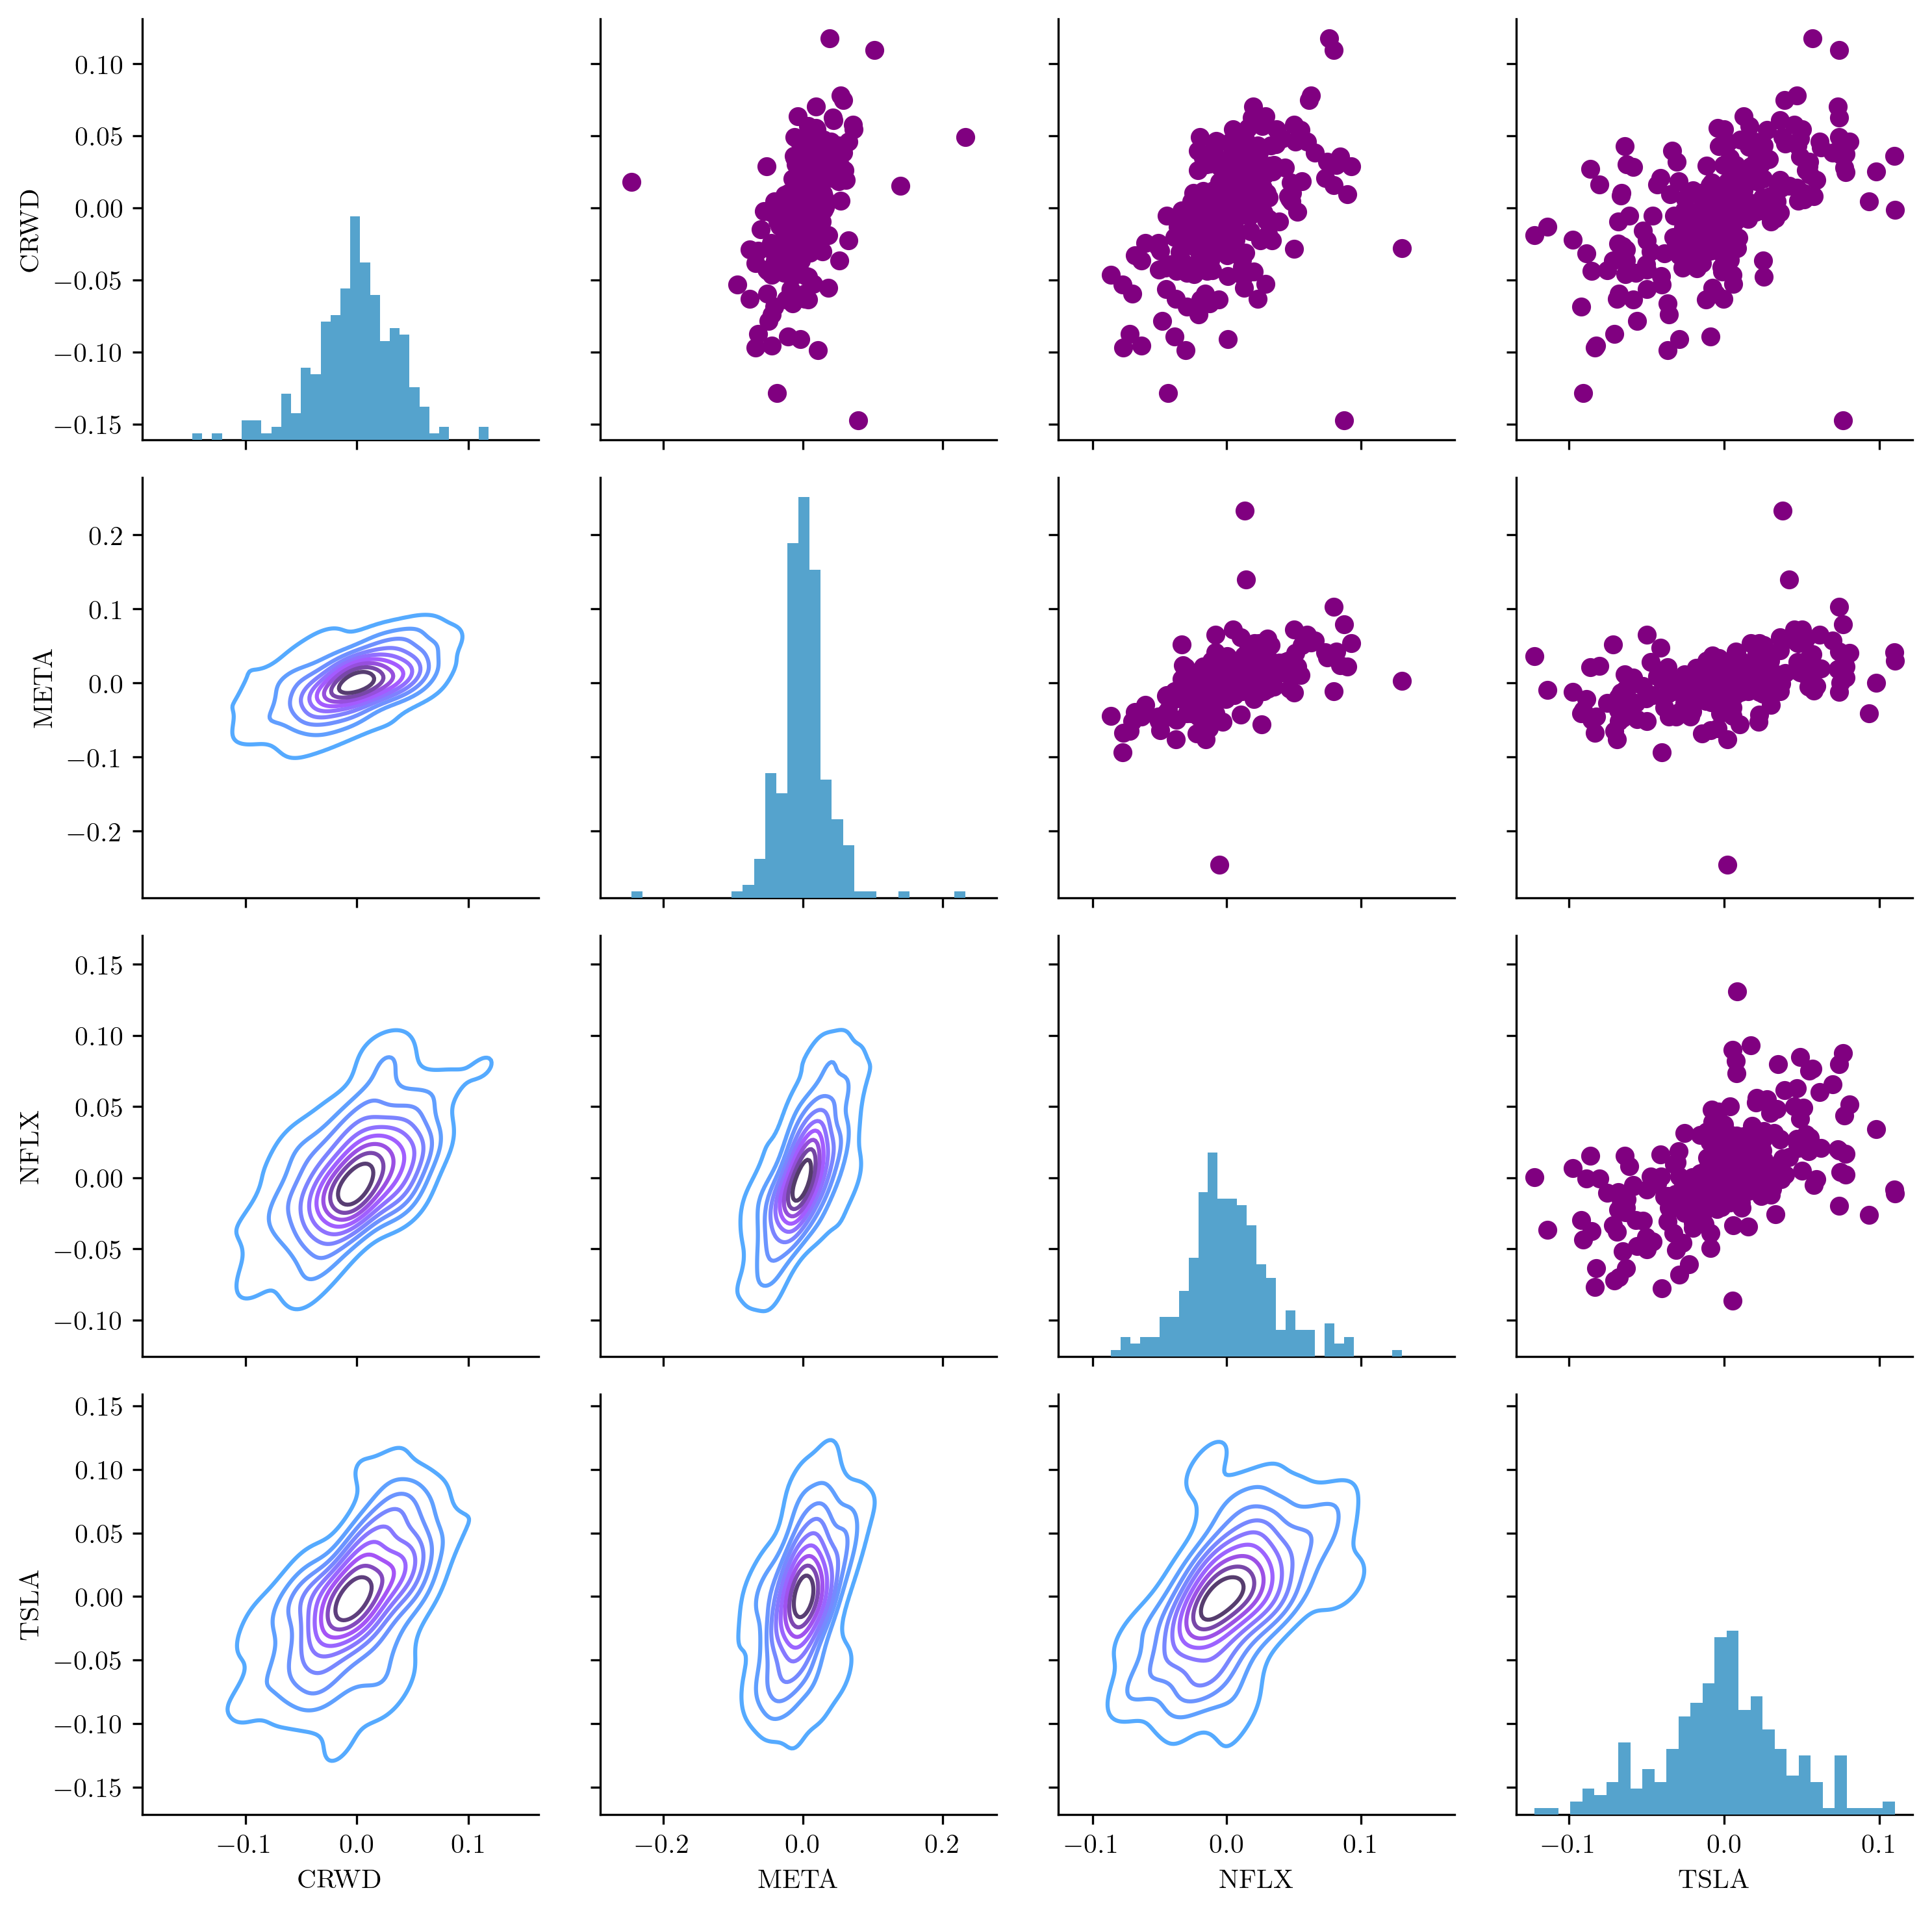

In [23]:

return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')


return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

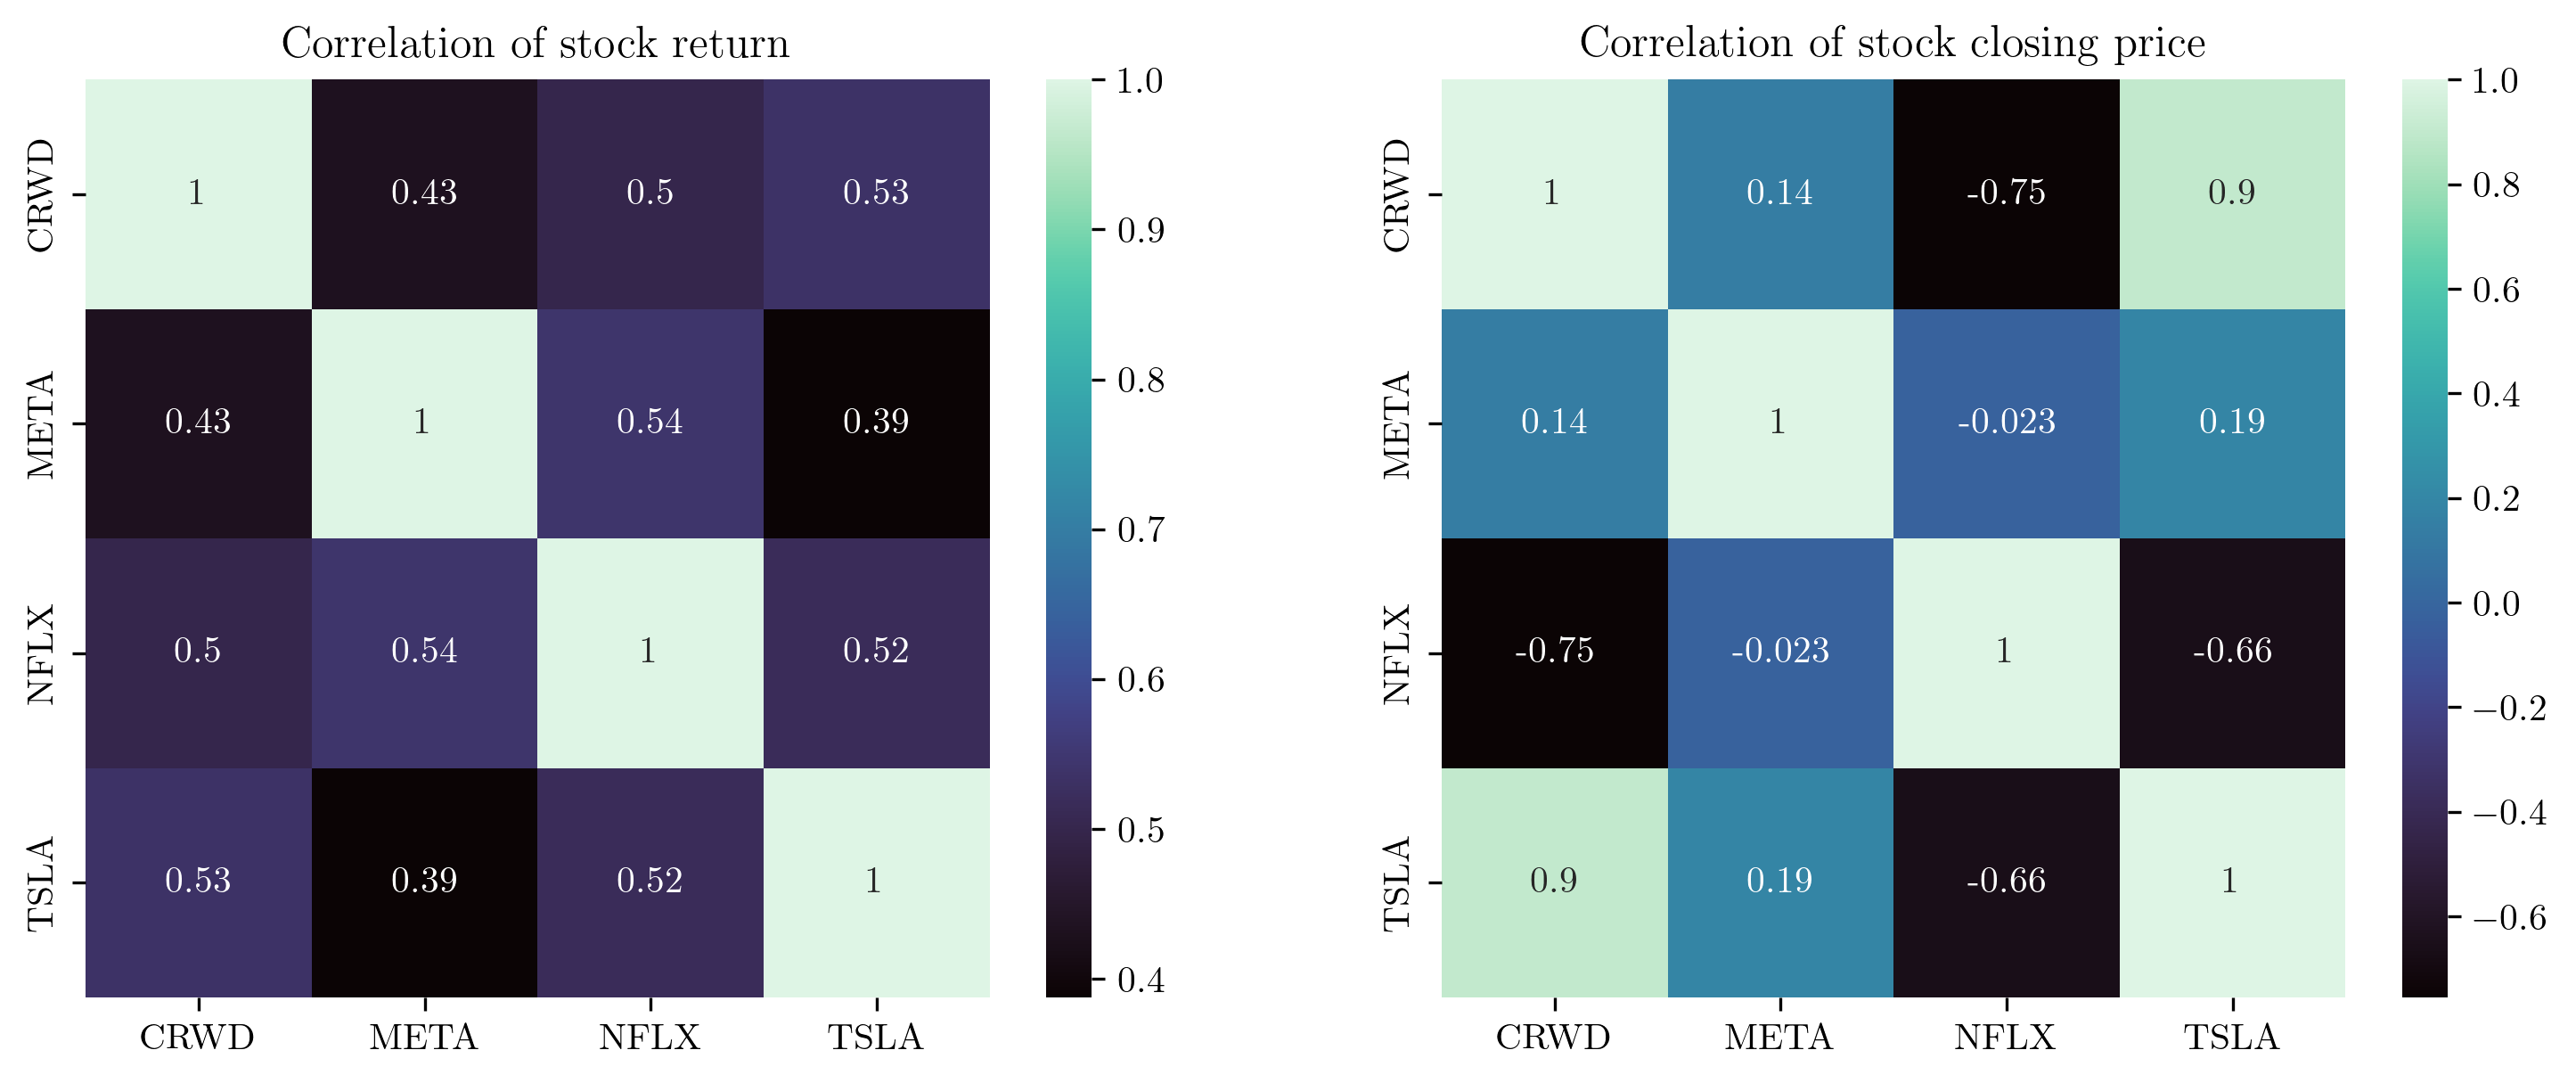

In [59]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='mako')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='mako')
plt.title('Correlation of stock closing price')

# 3. Forecasts

# LSTM (Long Short-Term Memory):

LSTM stands for Long Short-Term Memory, and it is a type of recurrent neural network (RNN) architecture that is specifically designed to address the vanishing gradient problem in standard RNNs.

LSTMs work by incorporating a memory cell, which allows the network to store information over a long period of time. The memory cell is controlled by gates, which regulate the flow of information into and out of the cell. The gates are comprised of sigmoid activation functions, which allow them to output values between 0 and 1, representing the degree to which they should allow or block information.

The three main gates in an LSTM are the input gate, output gate, and forget gate. The input gate controls the flow of new information into the memory cell, the output gate controls the flow of information out of the cell, and the forget gate controls the degree to which old information should be discarded from the cell.

During each time step of the LSTM, the input and forget gates receive inputs from the previous output and current input, and the output gate receives inputs from the current input and the current state of the memory cell. The gates then calculate their output values, which are multiplied by the current candidate value to determine how much of the candidate value should be added to or removed from the memory cell. The output gate then determines the final output value of the LSTM.


At time $t$, $c_j$'s output $y_{c_j}(t)$ is computed as:

$$y_{c_j}(t) = y_{out_j}(t)h(s_{c_j}(t))$$


where the "internal state" $s_{c_j}(t)$ is defined as:

$$s_{c_j}(0) = 0; \quad s_{c_j}(t) = s_{c_j}(t-1) + y_{in_j}(t)g(net_{c_j}(t))$$


for $t>0$. The differentiable function $g$ squashes $net_{c_j}$, and the differentiable function $h$ scales memory cell outputs computed from the internal state $s_c$.




In [60]:

df = pdr.get_data_yahoo('CRWD', start='2020-01-01', end=datetime.now())



df

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-12-31   49.340000   50.340000   48.900002   49.869999   49.869999   
2020-01-02   50.029999   50.750000   49.250000   49.439999   49.439999   
2020-01-03   48.919998   51.990002   48.790001   50.750000   50.750000   
2020-01-06   51.849998   56.169998   51.029999   55.110001   55.110001   
2020-01-07   54.549999   56.500000   54.500000   54.750000   54.750000   
...                ...         ...         ...         ...         ...   
2023-04-27  125.190002  127.500000  123.559998  126.050003  126.050003   
2023-04-28  123.199997  123.970001  119.419998  120.050003  120.050003   
2023-05-01  118.559998  119.938004  116.889999  118.790001  118.790001   
2023-05-02  118.900002  119.150002  116.040001  116.739998  116.739998   
2023-05-03  116.459999  119.004997  115.690002  117.669998  117.669998   

              Volume  
Date                  
2019-12-31   3288500  
2020-01-02   4428300  
2020-01-03  11165600  
2020-01-06  21725400  
2020-01-07  12503500  
...              ...  
2023-04-27   3097300  
2023-04-28   5191100  
2023-05-01   3724400  
2023-05-02   3077400  
2023-05-03   1886912  

[841 rows x 6 columns]

In [61]:

data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.06480379],
       [0.06315102],
       [0.06818619],
       [0.08494447],
       [0.08356076],
       [0.08705847],
       [0.08813468],
       [0.09297768],
       [0.09978093],
       [0.10081871],
       [0.10470078],
       [0.11234963],
       [0.11700043],
       [0.11234963],
       [0.11361803],
       [0.10969751],
       [0.10085714],
       [0.09628321],
       [0.10016528],
       [0.10473921],
       [0.11315679],
       [0.10792944],
       [0.10789101],
       [0.11740402],
       [0.11071607],
       [0.11215744],
       [0.11177308],
       [0.11642388],
       [0.12368838],
       [0.12326557],
       [0.12414959],
       [0.12238152],
       [0.12695546],
       [0.12691702],
       [0.11673138],
       [0.10731446],
       [0.09636009],
       [0.09505325],
       [0.09782066],
       [0.09413077],
       [0.10235616],
       [0.10039591],
       [0.09021025],
       [0.09297768],
       [0.08805781],
       [0.072837  ],
       [0.04892956],
       [0.053

In [62]:

train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.06480379, 0.06315102, 0.06818619, 0.08494447, 0.08356076,
       0.08705847, 0.08813468, 0.09297768, 0.09978093, 0.10081871,
       0.10470078, 0.11234963, 0.11700043, 0.11234963, 0.11361803,
       0.10969751, 0.10085714, 0.09628321, 0.10016528, 0.10473921,
       0.11315679, 0.10792944, 0.10789101, 0.11740402, 0.11071607,
       0.11215744, 0.11177308, 0.11642388, 0.12368838, 0.12326557,
       0.12414959, 0.12238152, 0.12695546, 0.12691702, 0.11673138,
       0.10731446, 0.09636009, 0.09505325, 0.09782066, 0.09413077,
       0.10235616, 0.10039591, 0.09021025, 0.09297768, 0.08805781,
       0.072837  , 0.04892956, 0.05342661, 0.03782143, 0.01848792,
       0.02513741, 0.        , 0.0192182 , 0.02160127, 0.033555  ,
       0.06149825, 0.07087675, 0.09347736, 0.0875197 , 0.09851252])]
[0.09908906927557537]

[array([0.06480379, 0.06315102, 0.06818619, 0.08494447, 0.08356076,
       0.08705847, 0.08813468, 0.09297768, 0.09978093, 0.10081871,
       0.10470078, 0.11234963, 0.11

In [63]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=4, epochs=1)


Epoch 1/10
185/185 [==============================] - 10s 40ms/step - loss: 0.0064
Epoch 2/10
185/185 [==============================] - 7s 39ms/step - loss: 0.0027
Epoch 3/10
185/185 [==============================] - 8s 43ms/step - loss: 0.0022
Epoch 4/10
185/185 [==============================] - 8s 44ms/step - loss: 0.0017
Epoch 5/10
185/185 [==============================] - 7s 40ms/step - loss: 0.0018
Epoch 6/10
185/185 [==============================] - 7s 38ms/step - loss: 0.0013
Epoch 7/10
185/185 [==============================] - 7s 40ms/step - loss: 0.0012
Epoch 8/10
185/185 [==============================] - 8s 44ms/step - loss: 0.0010
Epoch 9/10
185/185 [==============================] - 9s 49ms/step - loss: 8.7889e-04
Epoch 10/10
185/185 [==============================] - 7s 39ms/step - loss: 9.9262e-04


In [73]:

test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2.742145177984073

In [74]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

valid = valid.reset_index()
dates = pd.date_range(start="2023-03-03", periods=len(valid["Predictions"].values), freq="b")

format = '%m/%d/%Y'
valid['Date'] = pd.to_datetime(valid['Date'] ,format=format)
valid = valid.set_index(pd.DatetimeIndex(valid['Date']))

del valid['Date'] 


dates = pd.date_range(start="2023-03-03", periods=len(valid["Predictions"].values), freq="b")

C:\Users\zwitt\AppData\Local\Temp\ipykernel_23732\3006462230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


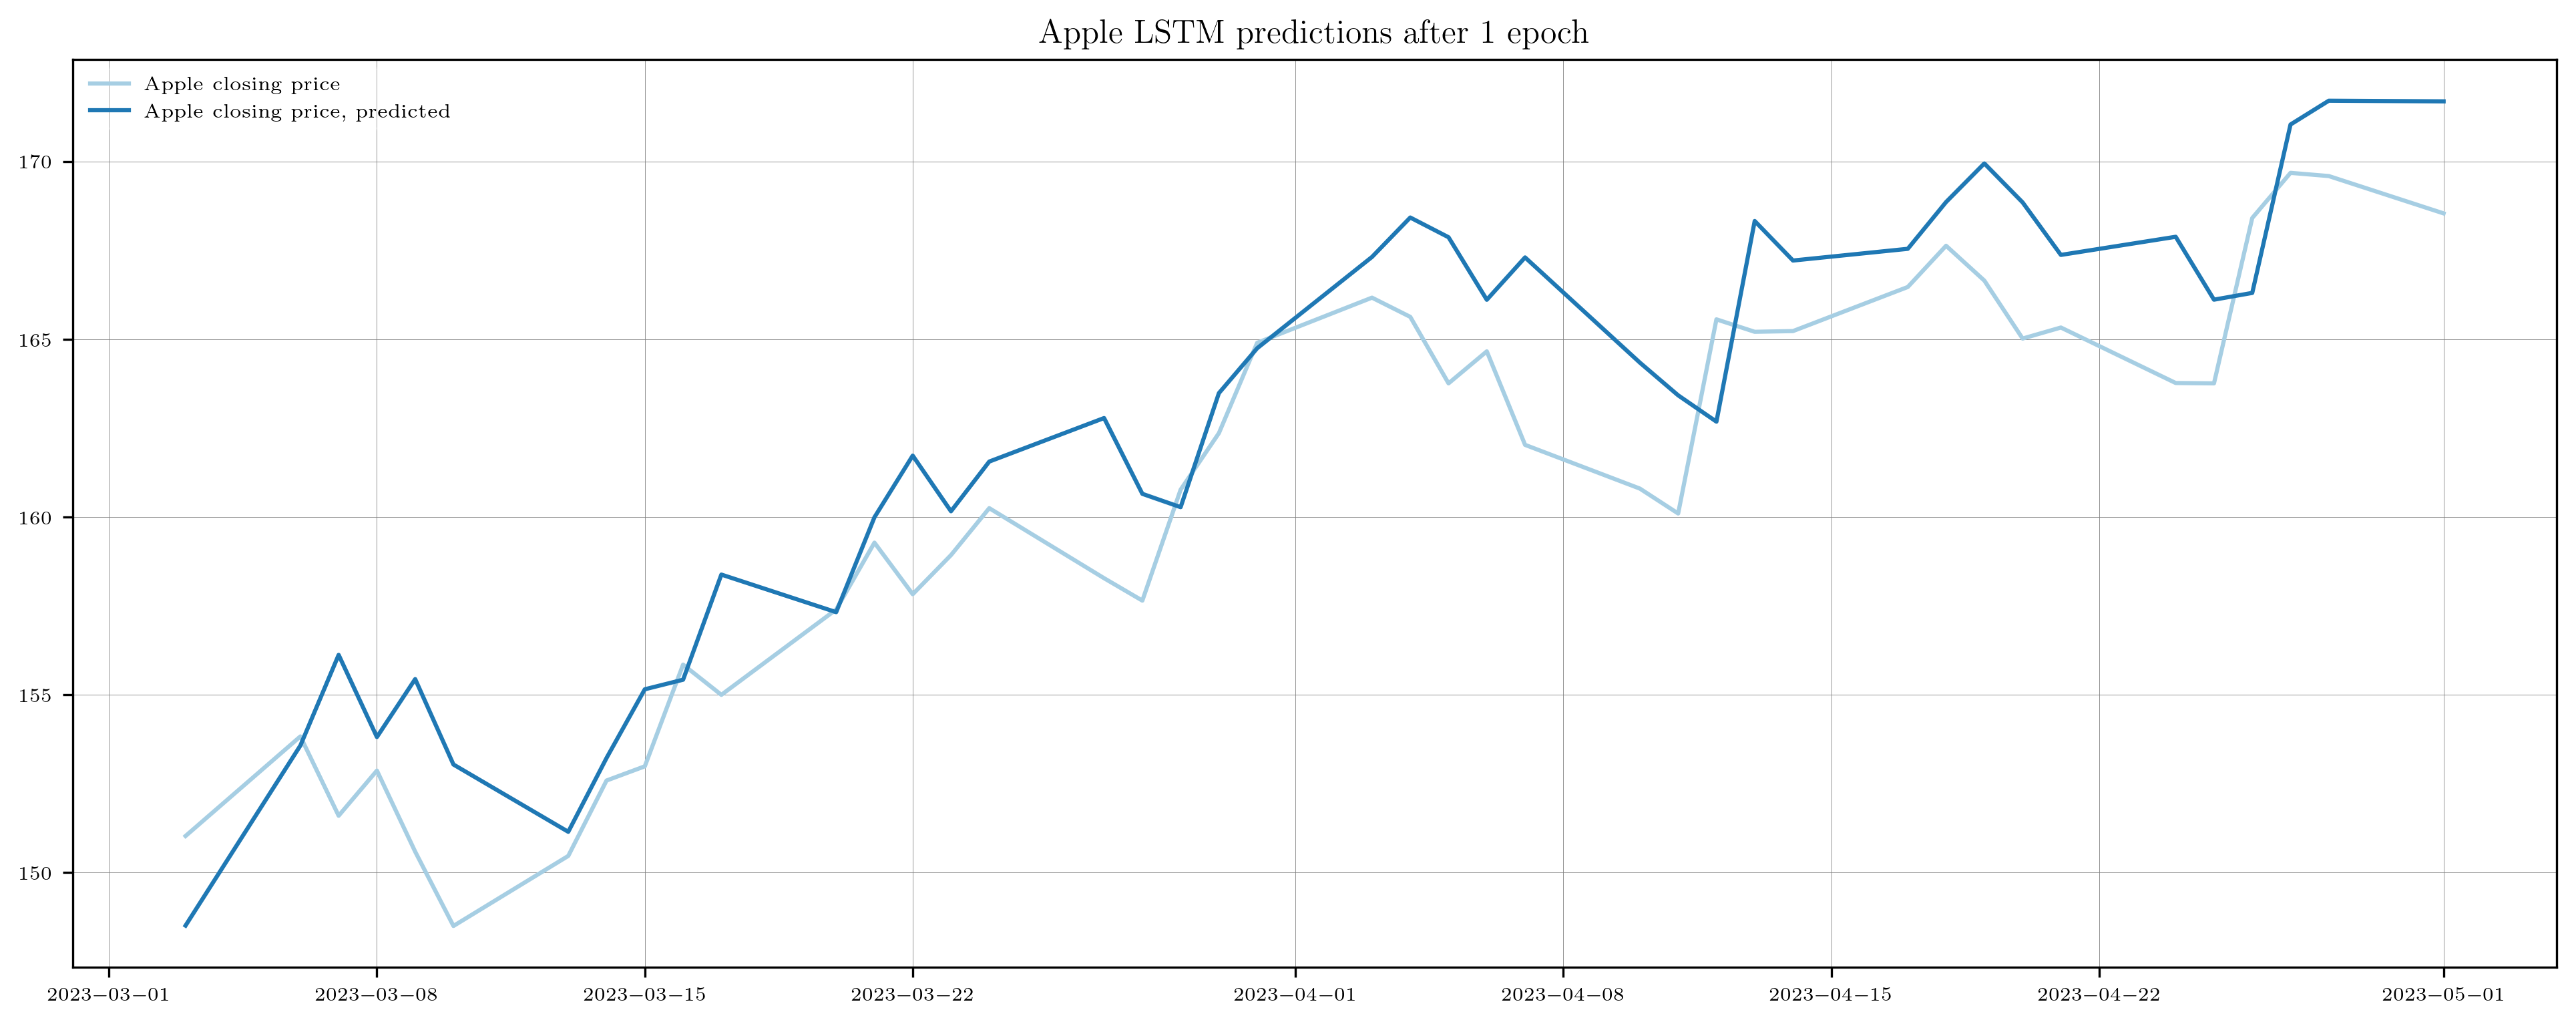

In [75]:
plt.figure(figsize=(16,6))
plt.title('Apple LSTM predictions after 1 epoch')

plt.plot(dates, list(valid["Close"].values),label="Apple closing price")
plt.plot(dates, list(valid["Predictions"].values), label="Apple closing price, predicted")

pl.legend(loc='upper left', fontsize='x-small', framealpha=0.2, edgecolor='white')
plt.grid(color='grey', linestyle='-', linewidth=0.2)
plt.show()

# Sources:
-LSTM: https://www.bioinf.jku.at/publications/older/2604.pdf